In [1]:
import pandas as pd
import numpy as np
import cx_Oracle
import os
import json
import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action="ignore")
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import bs4
import requests
import time
import math
import random
from shapely.geometry import Point, Polygon
import time as timesys
from pyproj import Geod
from haversine import haversine
pd.set_option('display.max_columns', None)

In [2]:
interpolation_number = "1000"

In [3]:
the_number_of_segment = 20

# 전항지 출항 확인

전항지 출항 지점 확인

In [4]:
import os
 
path_dir = 'voy_path'
 
file_list = os.listdir(path_dir)
file_new_list = []
for i in file_list:
    if "portmis" in i:
        file_new_list.append(i)

In [5]:
# ATA 확인
def check_ATA(df_test):
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
            break
            continue
    return stop_index

# 시각화 툴로 processed된 것들 확인

항로 클러스터링

In [6]:
# dense_upper_china_list = ['COSCO_FOS_VRKR6_23processed'
# ,'AKA_BHUM_9V7282_7processed'
# , 'COSCO_FOS_VRKR6_25processed'
# , 'MSC_LA_SPEZIA_DIGX2_2processed'
# , 'OOCL_NEW_YORK_VRJS2_2processed'
# , 'MSC_WASHINGTON_5LDP4_4processed'
# , 'MSC_SOFIA_PAZ_D5FL9_2processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_26processed'
# , 'OOCL_HAMBURG_VRZK9_6processed'
# , 'SEAMAX_STRATFORD_V7EP2_6processed'
# , 'OOCL_LUXEMBOURG_VRGO3_5processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_25processed'
# , 'MSC_LUCIANA_3FTY3_4processed'
# , 'MSC_RENEE_VRPL2_5processed'
# , 'COSCO_FOS_VRKR6_24processed'
# , 'COSCO_FOS_VRKR6_20processed'
# , 'COSCO_FOS_VRKR6_26processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_23processed'
# , 'OOCL_HAMBURG_VRZK9_5processed']

# AKA_BHUM_voyages_list = [
#     'COSCO_FOS_VRKR6_2022_20processed', 'COSCO_FOS_VRKR6_2022_23processed',
#     'COSCO_FOS_VRKR6_2022_24processed', 'COSCO_FOS_VRKR6_2022_25processed',
#     'AKA_BHUM_9V7282_2022_7processed', 'COSCO_FOS_VRKR6_2022_27processed',
#     'COSCO_FOS_VRKR6_2022_28processed', 'AKA_BHUM_9V7282_2022_7processed',
#     'COSCO_FOS_VRKR6_2022_30processed'
# ]

AKA_BHUM_voyages_list = [
    'AKA_BHUM_9V7282_2022_7processed', 'AKA_BHUM_9V7282_2022_8processed'
]
OOCL_NEW_YORK_voyages_list = [
    'OOCL_NEW_YORK_VRJS2_2022_1processed',
    'OOCL_NEW_YORK_VRJS2_2022_2processed',
    'OOCL_NEW_YORK_VRJS2_2022_3processed'
]

OOCL_LUXEMBOURG_voyages_list = [
    'OOCL_LUXEMBOURG_VRGO3_2022_5processed',
    'OOCL_LUXEMBOURG_VRGO3_2022_6processed'
]

OOCL_GENOA_voyages_list = [
    'OOCL_GENOA_VROK9_2022_3processed', 'OOCL_GENOA_VROK9_2022_5processed'
]

OOCL_HAMBURG_voyages_list = [
    'OOCL_HAMBURG_VRZK9_2022_5processed', 'OOCL_HAMBURG_VRZK9_2022_6processed'
]

SEAMAX_STRATFORD_voyages_list = [
    'SEAMAX_STRATFORD_V7EP2_2022_6processed',
    'SEAMAX_STRATFORD_V7EP2_2022_7processed'
]

ZIM_CHARLESTORN_voyages_list = [
    'ZIM_CHARLESTON_VRUC3_2022_6processed',
    'ZIM_CHARLESTON_VRUC3_2022_7processed'
]

single_voyage_list = [
    'MSC_ARIANE_3FDA3_2022_1processed', 'MSC_DANIT_3FZU8_2022_2processed',
    'MSC_EVA_3EVM7_2022_1processed', 'MSC_EXPRESS_III_A8LG7_2022_1processed',
    'MSC_KANOKO_D5TM3_2023_1processed', 'MSC_LA_SPEZIA_DIGX2_2022_2processed',
    'MSC_VANESSA_HOWD_2023_1processed', 'MSC_VIRGO_CQEB9_2023_2processed',
    'MSC_SOFIA_PAZ_D5FL9_2022_2processed',
    'MSC_WASHINGTON_5LDP4_2022_4processed',
    'MSC_RAVENNA_A8ZU8_2022_3processed', 'MSC_VANDYA_3FDW4_2022_2processed',
    'MSC_RENEE_VRPL2_2022_5processed', 'SEASPAN_OCEANIA_VRBI2_2023_1processed',
    'SEASPAN_BREEZE_VRNL8_2023_1processed', 'VALENCE_9HA3398_2023_1processed'
]

In [7]:
upper_china_path_dir = 'voy_path/upper_china/processed/'

# Tianjin to Busan PNIT

## AKA_BHUM

In [8]:
coordinates_array = pd.DataFrame(data={"latitude" : [],"longitude" : []})

for i in AKA_BHUM_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    coordinates_array = coordinates_array.append(df[["latitude","longitude"]], ignore_index=True)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from shapely.geometry import LineString

In [11]:
from scipy import interpolate
import pandas as pd

## below 3 knot 제거

### interpolation 1000

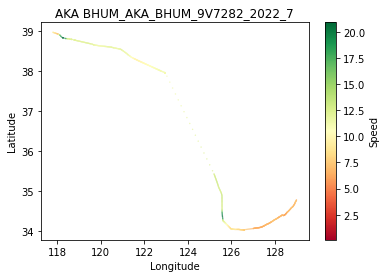

보간법 전 일반 평균 속도 : 9.372818311874106
보간법 전 일반 속도 표준편차: 3.188774981913939
보간법 전 저속 제거 평균 속도 : 9.372818311874106
보간법 전 저속 제거 속도 표준편차: 3.188774981913939
-
보간법 후 일반 평균 속도 : 10.041873979735712
보간법 후 일반 속도 표준편차: 2.4841795384233087
보간법 후 저속 제거 평균 속도 : 10.041873979735712
보간법 후 저속 제거 속도 표준편차: 2.4841795384233087


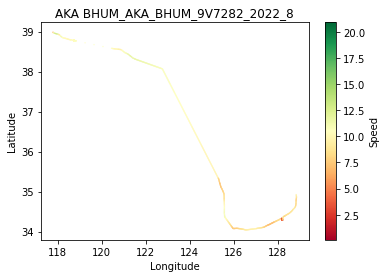

보간법 전 일반 평균 속도 : 8.860000000000001
보간법 전 일반 속도 표준편차: 1.4070373290383746
보간법 전 저속 제거 평균 속도 : 8.860000000000001
보간법 전 저속 제거 속도 표준편차: 1.4070373290383746
-
보간법 후 일반 평균 속도 : 8.971874833638685
보간법 후 일반 속도 표준편차: 2.2344675688714974
보간법 후 저속 제거 평균 속도 : 8.971874833638685
보간법 후 저속 제거 속도 표준편차: 2.2344675688714974


In [12]:
max_speed_list = []
min_speed_list = []
for i in AKA_BHUM_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in AKA_BHUM_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
    i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [13]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['AKA_BHUM_9V7282_2022_7', 'AKA_BHUM_9V7282_2022_8']

In [14]:
high_speed_path_data =[]
low_speed_path_data =[]
for i in AKA_BHUM_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [15]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_aka_bhum_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [16]:
# all_data = pd.concat(high_speed_path_data)

# # Add a new index column representing the row number
# all_data['index'] = range(len(all_data))
# all_data["index"] = all_data.index
# concaternated_df = all_data.groupby('index').mean()
# concaternated_df.to_csv(f"실험/upper_china_cosco_fos_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [17]:
result_df_dict=  {
    "experiment_no" : [],
    "mean_speed" : [],
    "max_speed" : []
}

In [18]:
# 가는 길인데 굳이 오래 돌아갈 필요는 없잖아 알고리즘
def optimal_next_point(current_position, shortest_point_idx, shortest_distance,
                       path_df):
    posi_c = current_position
    latitude_i = path_df.loc[shortest_point_idx, "latitude"]
    longitude_i = path_df.loc[shortest_point_idx, "longitude"]
    posi_i = (latitude_i, longitude_i)
    min_d = shortest_distance
    n = shortest_point_idx + 1
    while True:
        try:
            latitude_n = path_df.loc[n, "latitude"]
            longitude_n = path_df.loc[n, "longitude"]
            posi_n = (latitude_n, longitude_n)
            distance = haversine(posi_c, posi_n, unit="km")
            if n == shortest_point_idx + 1:
                path_distance = haversine(posi_i, posi_n, unit="km")
                paths_distance = path_distance
            else:
                path_distance = haversine(posi_n, posi_previous_n, unit="km")
                paths_distance += path_distance

            if distance < (paths_distance + min_d):
                optimal_next_point_idx = n
                return optimal_next_point_idx
            elif n == path_df.index[-1]:
                print("no better optimal_point")
                return shortest_point_idx + 1
            else:
                n = n + 1
                posi_previous_n = posi_n
        except:
            print("no better optimal_point")
            return shortest_point_idx + 1

In [19]:
# 인덱스 번호를 가지고 항로의 segment 번호를 찾음
# 만약 segment의 마지막 번호라면 seg_no를 하나 더한다.

def find_segment_no(optimal_point_idx, path_df, the_number_of_segment):
    seg_no = optimal_point_idx // (len(path_df) / the_number_of_segment)
    next_no = (optimal_point_idx + 1) // (len(path_df) / the_number_of_segment)
    if seg_no != next_no:
        return int(next_no)
    else:
        return int(seg_no)

In [20]:
# df 내의 포인트 전체 길이 구하는 함수
def reckon_point_lengths(df_test_2):
    distance = 0
    df_test_2.reset_index(inplace=True, drop=True)
    for idx in df_test_2.index:
        if idx != 0:
            LONGITUDE = df_test_2.loc[idx, "longitude"]
            LATITUDE = df_test_2.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
            LATITUDE = df_test_2.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            distance += haversine(current_coord, previous_current_coord, unit="km")
    return distance

In [21]:
def cal_duration(speed, distance):
    hour = int(distance // km_h)
    minute = int(
        (distance / km_h - hour) * 60)
    second = ((distance / km_h - hour) * 60 - minute) * 60
    duration = datetime.timedelta(hours=hour,minutes=minute, seconds=second)
    return duration

# ETA 실험 (interpolation 1000), AKA BHUM 7항차 저속

In [22]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_aka_bhum_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.669615e+09,117.794500,38.979000,7.700000
1,1.669616e+09,117.801165,38.974246,8.493696
2,1.669616e+09,117.812740,38.969502,9.285811
3,1.669616e+09,117.829662,38.965861,9.775980
4,1.669616e+09,117.847086,38.962360,10.227929
...,...,...,...,...
995,1.669880e+09,128.905563,34.817402,8.110371
996,1.669881e+09,128.907083,34.827681,8.171886
997,1.669881e+09,128.908842,34.836129,8.244922
998,1.669881e+09,128.910421,34.846361,8.290188


In [23]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [24]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [25]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [26]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

11.492015745521227
11.193259819644942
10.877774895002695
10.955789903739165
10.839288492665823
10.644641012859493
10.795270451108196
10.726010472759004
10.60885990903097
10.434456803869079
9.618301174439013
11.497158500675354
10.885240745870531
9.109605346132268
8.145193659855545
7.084058402011233
5.15906126124754
5.448864871070281
6.733543053948064
7.889093612293573


### segment로 평균 속도 적용 ETA 계산

#### 1. 순간 속력 이용 + 내가 만든 알고리즘  + 감속계수 (세그먼트 간)

In [27]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터

    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df, the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = current_speed / seg_mean_speed
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.1".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [28]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 12:23:54.220361
평균: 0 days 10:22:08.718478295


#### 2. 순간 속력 이용 + 알고리즘 x + 감속 계수 (세그먼트 간)

In [29]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [30]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = current_speed / seg_mean_speed
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.2".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [31]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 12:23:54.220361
평균: 0 days 10:22:08.718478295


In [32]:
test_df_26.sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
264,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.9472,34.2824,7.2,59.0,2022-11-05 01:41:07.975263,2022-11-04 16:40:24,2022-11-04 04:32:12,under way using engine,110.492280,204.631195,2022-11-05 01:11:52.099340,2022-11-05 01:34:31,0 days 00:22:38.900660
263,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.9361,34.2779,7.3,59.0,2022-11-05 01:36:05.224548,2022-11-04 16:35:23,2022-11-04 04:32:12,under way using engine,111.574020,205.132002,2022-11-05 00:59:50.714418,2022-11-05 01:34:31,0 days 00:34:40.285582
279,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.1303,34.3402,7.1,64.0,2022-11-05 03:01:53.865657,2022-11-04 18:01:03,2022-11-04 05:56:10,under way using engine,94.188115,175.771698,2022-11-05 00:56:22.252730,2022-11-05 01:34:31,0 days 00:38:08.747270
1,AKA BHUM,563135800,9307011.0,5888,KRBNP,11040600,117.8077,38.9692,9.4,129.0,2022-11-02 13:51:12.917427,2022-11-02 04:47:16,2022-11-02 04:44:30,under way using engine,1073.644946,1810.848078,2022-11-05 00:53:36.967496,2022-11-05 01:34:31,0 days 00:40:54.032504
278,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.1201,34.3365,7.1,63.0,2022-11-05 02:56:51.297444,2022-11-04 17:56:23,2022-11-04 05:44:12,under way using engine,95.120065,177.510882,2022-11-05 00:51:42.252730,2022-11-05 01:34:31,0 days 00:42:48.747270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9396,34.7394,7.4,49.0,2022-11-05 10:05:50.892397,2022-11-05 01:04:21,2022-11-05 01:02:10,under way using engine,27.846130,50.840113,NaT,2022-11-05 01:34:31,NaT
345,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9572,34.7526,7.2,32.0,2022-11-05 10:15:56.270667,2022-11-05 01:13:52,2022-11-05 01:08:12,under way using engine,27.206372,50.386077,NaT,2022-11-05 01:34:31,NaT
346,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9654,34.7630,7.2,30.0,2022-11-05 10:20:59.178779,2022-11-05 01:20:06,2022-11-05 01:20:10,under way using engine,26.552967,49.175973,NaT,2022-11-05 01:34:31,NaT
347,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9789,34.7798,7.3,29.0,2022-11-05 10:31:04.891425,2022-11-05 01:30:01,2022-11-05 01:20:10,under way using engine,25.631893,47.124963,NaT,2022-11-05 01:34:31,NaT


#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [33]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [34]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.3".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [35]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 04:51:19.179098
평균: 0 days 01:56:47.617395169


In [36]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
4,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.1269,38.8976,16.8,129.0,2022-11-02 15:12:49.646277,2022-11-02 06:06:35,2022-11-02 05:56:14,under way using engine,1045.025952,2326.738581,2022-11-05 01:36:16.898173,2022-11-05 01:34:31,0 days 00:01:45.898173
264,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.9472,34.2824,7.2,59.0,2022-11-05 01:41:07.975263,2022-11-04 16:40:24,2022-11-04 04:32:12,under way using engine,110.492280,204.631195,2022-11-05 01:36:26.551629,2022-11-05 01:34:31,0 days 00:01:55.551629
21,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.7925,38.7770,11.9,99.0,2022-11-02 17:23:57.155716,2022-11-02 08:19:43,2022-11-02 08:14:16,under way using engine,986.527238,1704.723341,2022-11-05 01:36:57.650746,2022-11-05 01:34:31,0 days 00:02:26.650746
263,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.9361,34.2779,7.3,59.0,2022-11-05 01:36:05.224548,2022-11-04 16:35:23,2022-11-04 04:32:12,under way using engine,111.574020,205.132002,2022-11-05 01:31:25.551629,2022-11-05 01:34:31,0 days 00:03:05.448371
64,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,121.0239,38.5067,11.4,114.0,2022-11-03 02:29:03.864811,2022-11-02 17:28:44,2022-11-02 05:14:14,under way using engine,797.848008,1360.631328,2022-11-05 01:38:00.824165,2022-11-05 01:34:31,0 days 00:03:29.824165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,125.3708,35.1735,12.9,150.0,2022-11-04 04:59:29.903426,2022-11-03 19:58:36,2022-11-02 07:44:12,under way using engine,314.649574,563.597671,2022-11-04 21:02:51.820902,2022-11-05 01:34:31,0 days 04:31:39.179098
99,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,125.3621,35.1887,12.9,151.0,2022-11-04 04:54:26.719729,2022-11-03 19:53:56,2022-11-02 07:44:12,under way using engine,315.535855,565.185170,2022-11-04 20:58:11.820902,2022-11-05 01:34:31,0 days 04:36:19.179098
98,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,125.3527,35.2048,12.7,148.0,2022-11-04 04:49:24.626738,2022-11-03 19:48:56,2022-11-02 07:44:12,under way using engine,316.500341,562.341018,2022-11-04 20:53:11.820902,2022-11-05 01:34:31,0 days 04:41:19.179098
97,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,125.3421,35.2213,13.0,148.0,2022-11-04 04:44:21.288788,2022-11-03 19:43:44,2022-11-02 07:44:12,under way using engine,317.585827,571.253718,2022-11-04 20:47:59.820902,2022-11-05 01:34:31,0 days 04:46:31.179098


#### 4. 순간 속력 이용 + 알고리즘 x + 감속 계수 (전체 속력 평균)

In [37]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [38]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.4".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [39]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 19:30:04.350822
평균: 0 days 15:32:15.948861737


In [40]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
300,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.3692,34.4009,7.1,108.0,2022-11-05 04:52:54.725540,2022-11-04 19:52:33,2022-11-04 07:44:10,under way using engine,75.456465,140.815124,2022-11-05 00:55:00.554878,2022-11-05 01:34:31,0 days 00:39:30.445122
299,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.3501,34.4073,7.0,110.0,2022-11-05 04:47:52.091552,2022-11-04 19:43:50,2022-11-04 07:44:10,under way using engine,75.834546,142.652305,2022-11-05 00:46:49.664815,2022-11-05 01:34:31,0 days 00:47:41.335185
338,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.8831,34.6755,7.1,40.0,2022-11-05 09:25:27.895215,2022-11-05 00:24:02,2022-11-05 12:20:10,under way using engine,33.214596,61.984317,2022-11-05 00:24:02.000000,2022-11-05 01:34:31,0 days 01:10:29
294,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.2933,34.3963,7.0,63.0,2022-11-05 04:17:34.686249,2022-11-04 19:17:13,2022-11-04 07:08:10,under way using engine,79.864353,150.232772,2022-11-05 00:20:45.872826,2022-11-05 01:34:31,0 days 01:13:45.127174
337,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.8751,34.6685,7.1,39.0,2022-11-05 09:20:25.427528,2022-11-05 00:19:10,2022-11-05 12:20:10,under way using engine,33.864049,63.196312,2022-11-05 00:19:10.000000,2022-11-05 01:34:31,0 days 01:15:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.5316,38.8073,12.2,98.0,2022-11-02 16:18:20.567192,2022-11-02 07:18:02,2022-11-02 07:14:14,under way using engine,1008.747013,1759.798302,2022-11-06 17:27:10.601729,2022-11-05 01:34:31,1 days 15:52:39.601729
8,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.3849,38.8163,18.0,98.0,2022-11-02 15:48:02.901253,2022-11-02 06:47:35,2022-11-02 06:44:12,under way using engine,1020.927304,2462.315097,2022-11-06 18:25:22.684739,2022-11-05 01:34:31,1 days 16:50:51.684739
11,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.4883,38.8114,12.4,99.0,2022-11-02 16:13:23.707114,2022-11-02 07:08:07,2022-11-02 07:02:12,under way using engine,1012.399736,1778.522356,2022-11-06 18:33:29.554574,2022-11-05 01:34:31,1 days 16:58:58.554574
10,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.4656,38.8137,12.6,98.0,2022-11-02 16:03:11.762970,2022-11-02 07:02:53,2022-11-02 07:02:12,under way using engine,1014.321341,1795.200529,2022-11-06 19:50:13.413649,2022-11-05 01:34:31,1 days 18:15:42.413649


#### 5. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [41]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [42]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    
    if real_speed < 7 * 1.852:
        continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / initial_seg_df["speed"].mean()
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] * 1.852
                speed_damping_ratio = real_speed / d_speed
                km_h = d_speed * speed_damping_ratio
                
                
                LONGITUDE = next_seg_df.loc[iiii, "longitude"]
                LATITUDE = next_seg_df.loc[iiii, "latitude"]
                current_coord = (LATITUDE, LONGITUDE)

                LONGITUDE = next_seg_df.loc[iiii - 1, "longitude"]
                LATITUDE = next_seg_df.loc[iiii - 1, "latitude"]
                previous_current_coord = (LATITUDE, LONGITUDE)

                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.5".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [43]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 3 days 07:18:11.652196
평균: 1 days 00:02:20.366337173


In [44]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
339,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9006,34.6901,6.8,24.0,2022-11-05 09:35:33.633894,2022-11-05 00:34:21,2022-11-05 12:20:10,under way using engine,31.949465,61.128156,2022-11-05 00:24:02.000000,2022-11-05 01:34:31,0 days 01:10:29
338,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.8831,34.6755,7.1,40.0,2022-11-05 09:25:27.895215,2022-11-05 00:24:02,2022-11-05 12:20:10,under way using engine,33.214596,61.984317,2022-11-05 00:24:02.000000,2022-11-05 01:34:31,0 days 01:10:29
318,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.5801,34.4915,6.9,60.0,2022-11-05 06:49:00.383186,2022-11-04 21:45:51,2022-11-04 09:44:10,under way using engine,57.486123,109.039065,2022-11-05 00:24:02.000000,2022-11-05 01:34:31,0 days 01:10:29
319,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.6116,34.5063,7.2,56.0,2022-11-05 07:04:08.568258,2022-11-04 22:01:01,2022-11-04 10:02:10,under way using engine,54.906119,101.685881,2022-11-05 00:24:02.000000,2022-11-05 01:34:31,0 days 01:10:29
321,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.6429,34.5233,6.9,49.0,2022-11-05 07:19:17.222437,2022-11-04 22:16:40,2022-11-04 10:08:12,under way using engine,52.182152,98.978549,2022-11-05 00:24:02.000000,2022-11-05 01:34:31,0 days 01:10:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.5783,38.8029,12.1,98.0,2022-11-02 16:33:29.820166,2022-11-02 07:28:58,2022-11-02 07:20:12,under way using engine,1004.809718,1747.151791,2022-11-07 05:24:15.234218,2022-11-05 01:34:31,2 days 03:49:44.234218
17,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.6646,38.7935,12.0,100.0,2022-11-02 16:53:39.852756,2022-11-02 07:49:18,2022-11-02 07:50:13,under way using engine,997.484387,1728.915896,2022-11-07 06:45:47.729581,2022-11-05 01:34:31,2 days 05:11:16.729581
2,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.0403,38.9269,7.1,118.0,2022-11-02 14:47:46.129923,2022-11-02 05:46:19,2022-11-02 05:31:15,under way using engine,1053.190809,1965.440518,2022-11-07 08:53:13.705553,2022-11-05 01:34:31,2 days 07:18:42.705553
1,AKA BHUM,563135800,9307011.0,5888,KRBNP,11040600,117.8077,38.9692,9.4,129.0,2022-11-02 13:51:12.917427,2022-11-02 04:47:16,2022-11-02 04:44:30,under way using engine,1073.644946,1810.848078,2022-11-07 17:46:55.145760,2022-11-05 01:34:31,2 days 16:12:24.145760


#### 6. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [45]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [46]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    
    if real_speed < 7 * 1.852:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / initial_seg_df["speed"].mean()
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] * 1.852
                speed_damping_ratio = 1
                km_h = d_speed * speed_damping_ratio
                
                
                LONGITUDE = next_seg_df.loc[iiii, "longitude"]
                LATITUDE = next_seg_df.loc[iiii, "latitude"]
                current_coord = (LATITUDE, LONGITUDE)

                LONGITUDE = next_seg_df.loc[iiii - 1, "longitude"]
                LATITUDE = next_seg_df.loc[iiii - 1, "latitude"]
                previous_current_coord = (LATITUDE, LONGITUDE)

                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.6".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [47]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 17:41:40.710533
평균: 1 days 08:23:55.315269262


In [48]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
339,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9006,34.6901,6.8,24.0,2022-11-05 09:35:33.633894,2022-11-05 00:34:21,2022-11-05 12:20:10,under way using engine,31.949465,61.128156,2022-11-05 00:24:02.000000,2022-11-05 01:34:31,0 days 01:10:29
318,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.5801,34.4915,6.9,60.0,2022-11-05 06:49:00.383186,2022-11-04 21:45:51,2022-11-04 09:44:10,under way using engine,57.486123,109.039065,2022-11-05 00:24:02.000000,2022-11-05 01:34:31,0 days 01:10:29
319,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.6116,34.5063,7.2,56.0,2022-11-05 07:04:08.568258,2022-11-04 22:01:01,2022-11-04 10:02:10,under way using engine,54.906119,101.685881,2022-11-05 00:24:02.000000,2022-11-05 01:34:31,0 days 01:10:29
320,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.6210,34.5113,7.1,55.0,2022-11-05 07:09:11.392850,2022-11-04 22:05:44,2022-11-04 10:08:12,under way using engine,54.090651,100.942731,2022-11-05 00:24:02.000000,2022-11-05 01:34:31,0 days 01:10:29
321,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.6429,34.5233,6.9,49.0,2022-11-05 07:19:17.222437,2022-11-04 22:16:40,2022-11-04 10:08:12,under way using engine,52.182152,98.978549,2022-11-05 00:24:02.000000,2022-11-05 01:34:31,0 days 01:10:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.5316,38.8073,12.2,98.0,2022-11-02 16:18:20.567192,2022-11-02 07:18:02,2022-11-02 07:14:14,under way using engine,1008.747013,1759.798302,2022-11-07 19:16:11.710533,2022-11-05 01:34:31,2 days 17:41:40.710533
13,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.5783,38.8029,12.1,98.0,2022-11-02 16:33:29.820166,2022-11-02 07:28:58,2022-11-02 07:20:12,under way using engine,1004.809718,1747.151791,2022-11-07 19:16:11.710533,2022-11-05 01:34:31,2 days 17:41:40.710533
14,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.5967,38.8011,12.0,97.0,2022-11-02 16:38:31.449664,2022-11-02 07:33:13,2022-11-02 07:20:12,under way using engine,1003.256033,1738.919752,2022-11-07 19:16:11.710533,2022-11-05 01:34:31,2 days 17:41:40.710533
8,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.3849,38.8163,18.0,98.0,2022-11-02 15:48:02.901253,2022-11-02 06:47:35,2022-11-02 06:44:12,under way using engine,1020.927304,2462.315097,2022-11-07 19:16:11.710533,2022-11-05 01:34:31,2 days 17:41:40.710533


#### 7. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x

In [49]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [50]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    if real_speed < 7 * 1.852:
        continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
        damped_mean_speed = 1
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
        
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.7".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [51]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 26 days 15:01:12.094430
평균: 12 days 04:20:18.890948234


In [52]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
339,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9006,34.6901,6.8,24.0,2022-11-05 09:35:33.633894,2022-11-05 00:34:21,2022-11-05 12:20:10,under way using engine,31.949465,61.128156,2022-11-05 00:24:02.000000,2022-11-05 01:34:31,0 days 01:10:29
318,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.5801,34.4915,6.9,60.0,2022-11-05 06:49:00.383186,2022-11-04 21:45:51,2022-11-04 09:44:10,under way using engine,57.486123,109.039065,2022-11-05 00:24:02.000000,2022-11-05 01:34:31,0 days 01:10:29
319,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.6116,34.5063,7.2,56.0,2022-11-05 07:04:08.568258,2022-11-04 22:01:01,2022-11-04 10:02:10,under way using engine,54.906119,101.685881,2022-11-05 00:24:02.000000,2022-11-05 01:34:31,0 days 01:10:29
320,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.6210,34.5113,7.1,55.0,2022-11-05 07:09:11.392850,2022-11-04 22:05:44,2022-11-04 10:08:12,under way using engine,54.090651,100.942731,2022-11-05 00:24:02.000000,2022-11-05 01:34:31,0 days 01:10:29
321,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.6429,34.5233,6.9,49.0,2022-11-05 07:19:17.222437,2022-11-04 22:16:40,2022-11-04 10:08:12,under way using engine,52.182152,98.978549,2022-11-05 00:24:02.000000,2022-11-05 01:34:31,0 days 01:10:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.5316,38.8073,12.2,98.0,2022-11-02 16:18:20.567192,2022-11-02 07:18:02,2022-11-02 07:14:14,under way using engine,1008.747013,1759.798302,2022-12-01 16:35:43.094430,2022-11-05 01:34:31,26 days 15:01:12.094430
13,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.5783,38.8029,12.1,98.0,2022-11-02 16:33:29.820166,2022-11-02 07:28:58,2022-11-02 07:20:12,under way using engine,1004.809718,1747.151791,2022-12-01 16:35:43.094430,2022-11-05 01:34:31,26 days 15:01:12.094430
14,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.5967,38.8011,12.0,97.0,2022-11-02 16:38:31.449664,2022-11-02 07:33:13,2022-11-02 07:20:12,under way using engine,1003.256033,1738.919752,2022-12-01 16:35:43.094430,2022-11-05 01:34:31,26 days 15:01:12.094430
8,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.3849,38.8163,18.0,98.0,2022-11-02 15:48:02.901253,2022-11-02 06:47:35,2022-11-02 06:44:12,under way using engine,1020.927304,2462.315097,2022-12-01 16:35:43.094430,2022-11-05 01:34:31,26 days 15:01:12.094430


#### 8. 순간 속력 이용 + 알고리즘 x + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [53]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [54]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        speed_damping_ratio = current_speed / next_seg_df["speed"].mean()
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] 
                km_h = d_speed * 1.852 * speed_damping_ratio
                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.8".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [55]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 01:33:33.730429
평균: 0 days 19:08:36.723554464


In [56]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
236,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.6385,34.1844,7.0,71.0,2022-11-04 23:19:48.866175,2022-11-04 14:19:22,2022-11-04 01:38:11,under way using engine,138.969866,261.416107,2022-11-05 01:19:37.997478,2022-11-05 01:34:31,0 days 00:14:53.002522
264,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.9472,34.2824,7.2,59.0,2022-11-05 01:41:07.975263,2022-11-04 16:40:24,2022-11-04 04:32:12,under way using engine,110.492280,204.631195,2022-11-05 00:42:40.391163,2022-11-05 01:34:31,0 days 00:51:50.608837
263,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.9361,34.2779,7.3,59.0,2022-11-05 01:36:05.224548,2022-11-04 16:35:23,2022-11-04 04:32:12,under way using engine,111.574020,205.132002,2022-11-05 00:31:03.002252,2022-11-05 01:34:31,0 days 01:03:27.997748
338,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.8831,34.6755,7.1,40.0,2022-11-05 09:25:27.895215,2022-11-05 00:24:02,2022-11-05 12:20:10,under way using engine,33.214596,61.984317,2022-11-05 00:24:02.000000,2022-11-05 01:34:31,0 days 01:10:29
261,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.9146,34.2690,7.3,59.0,2022-11-05 01:25:59.438198,2022-11-04 16:25:43,2022-11-04 04:14:10,under way using engine,113.686369,209.015615,2022-11-05 00:21:23.002252,2022-11-05 01:34:31,0 days 01:13:07.997748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.3868,38.8162,18.0,99.0,2022-11-02 15:53:05.827225,2022-11-02 06:47:50,2022-11-02 06:44:12,under way using engine,1020.770109,2461.935968,2022-11-03 03:04:56.074112,2022-11-05 01:34:31,1 days 22:29:34.925888
8,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.3849,38.8163,18.0,98.0,2022-11-02 15:48:02.901253,2022-11-02 06:47:35,2022-11-02 06:44:12,under way using engine,1020.927304,2462.315097,2022-11-03 03:04:41.074112,2022-11-05 01:34:31,1 days 22:29:49.925888
5,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.1824,38.8602,19.6,129.0,2022-11-02 15:22:50.975897,2022-11-02 06:17:43,2022-11-02 06:20:14,under way using engine,1039.037228,2797.284621,2022-11-03 00:55:27.761935,2022-11-05 01:34:31,2 days 00:39:03.238065
6,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.2406,38.8353,20.6,100.0,2022-11-02 15:27:51.828408,2022-11-02 06:26:59,2022-11-02 06:20:14,under way using engine,1033.335460,2981.965527,2022-11-03 00:10:28.190966,2022-11-05 01:34:31,2 days 01:24:02.809034


#### 9. 순간 속력 이용 + 알고리즘 x + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [57]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [58]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        speed_damping_ratio = 1
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] 
                km_h = d_speed * 1.852 * speed_damping_ratio
                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.9".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [59]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 03:36:49.179110
평균: 0 days 11:53:51.361763568


In [60]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")["eta"].value_counts()

11050900    220
11040600      2
Name: eta, dtype: int64

In [61]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
264,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.9472,34.2824,7.2,59.0,2022-11-05 01:41:07.975263,2022-11-04 16:40:24,2022-11-04 04:32:12,under way using engine,110.492280,204.631195,2022-11-05 01:31:16.845789,2022-11-05 01:34:31,0 days 00:03:14.154211
263,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.9361,34.2779,7.3,59.0,2022-11-05 01:36:05.224548,2022-11-04 16:35:23,2022-11-04 04:32:12,under way using engine,111.574020,205.132002,2022-11-05 01:26:15.845789,2022-11-05 01:34:31,0 days 00:08:15.154211
262,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.9255,34.2735,7.4,60.0,2022-11-05 01:31:02.428314,2022-11-04 16:30:34,2022-11-04 04:14:10,under way using engine,112.615917,205.608677,2022-11-05 01:21:26.845789,2022-11-05 01:34:31,0 days 00:13:04.154211
261,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.9146,34.2690,7.3,59.0,2022-11-05 01:25:59.438198,2022-11-04 16:25:43,2022-11-04 04:14:10,under way using engine,113.686369,209.015615,2022-11-05 01:16:35.845789,2022-11-05 01:34:31,0 days 00:17:55.154211
260,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.9032,34.2644,7.3,59.0,2022-11-05 01:20:57.113505,2022-11-04 16:20:33,2022-11-04 04:14:10,under way using engine,114.798809,211.060869,2022-11-05 01:11:25.845789,2022-11-05 01:34:31,0 days 00:23:05.154211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.6258,38.7983,12.0,98.0,2022-11-02 16:43:34.686190,2022-11-02 07:40:10,2022-11-02 07:20:12,under way using engine,1000.801228,1734.664898,2022-11-03 23:09:58.972961,2022-11-05 01:34:31,1 days 02:24:32.027039
3,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.0436,38.9257,8.0,115.0,2022-11-02 14:53:09.039079,2022-11-02 05:47:36,2022-11-02 05:31:15,under way using engine,1052.876352,1855.552092,2022-11-03 23:00:06.820890,2022-11-05 01:34:31,1 days 02:34:24.179110
2,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.0403,38.9269,7.1,118.0,2022-11-02 14:47:46.129923,2022-11-02 05:46:19,2022-11-02 05:31:15,under way using engine,1053.190809,1965.440518,2022-11-03 22:58:49.820890,2022-11-05 01:34:31,1 days 02:35:41.179110
1,AKA BHUM,563135800,9307011.0,5888,KRBNP,11040600,117.8077,38.9692,9.4,129.0,2022-11-02 13:51:12.917427,2022-11-02 04:47:16,2022-11-02 04:44:30,under way using engine,1073.644946,1810.848078,2022-11-03 21:59:46.820890,2022-11-05 01:34:31,1 days 03:34:44.179110


### segment 없이

#### 1. 순간 속력 이용 + 내가 만든 알고리즘  + 감속계수 (세그먼트 간)

In [62]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [63]:
whole_mean_speed= low_speed_interpolated_df["speed"].mean()
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
            
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 1. 감속 계수
    speed_damping_ratio = current_speed / whole_mean_speed
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.1".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [64]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 12:33:31.382604
평균: 0 days 13:19:33.839674840


#### 2. 순간 속력 이용 + 알고리즘 x + 감속 계수 (세그먼트 간)

In [65]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [66]:
whole_mean_speed= low_speed_interpolated_df["speed"].mean()
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
            
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 1. 감속 계수
    speed_damping_ratio = current_speed / whole_mean_speed
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.2".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [67]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 12:33:31.382604
평균: 0 days 13:19:33.839674840


In [68]:
test_df_26.sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
161,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,126.3075,34.0516,8.2,81.0,2022-11-04 13:44:26.528228,2022-11-04 04:43:53,2022-11-02 07:44:12,under way using engine,251.772040,439.552309,2022-11-05 01:28:56.445370,2022-11-05 01:34:31,0 days 00:05:34.554630
166,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,126.3846,34.0484,8.2,84.0,2022-11-04 14:14:42.071224,2022-11-04 05:11:35,2022-11-02 07:44:12,under way using engine,245.483742,428.573981,2022-11-05 01:23:45.932316,2022-11-05 01:34:31,0 days 00:10:45.067684
170,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,126.5135,34.0396,8.1,84.0,2022-11-04 15:00:07.536439,2022-11-04 05:58:34,2022-11-02 07:44:12,under way using engine,235.241329,412.573826,2022-11-05 01:47:48.731693,2022-11-05 01:34:31,0 days 00:13:17.731693
167,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,126.4397,34.0444,8.2,86.0,2022-11-04 14:34:53.445962,2022-11-04 05:31:33,2022-11-02 07:44:12,under way using engine,241.099323,420.919512,2022-11-05 01:21:08.620891,2022-11-05 01:34:31,0 days 00:13:22.379109
168,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,126.4750,34.0419,8.2,84.0,2022-11-04 14:44:58.967805,2022-11-04 05:44:23,2022-11-02 07:44:12,under way using engine,238.301354,416.034721,2022-11-05 01:20:36.800911,2022-11-05 01:34:31,0 days 00:13:54.199089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9396,34.7394,7.4,49.0,2022-11-05 10:05:50.892397,2022-11-05 01:04:21,2022-11-05 01:02:10,under way using engine,27.846130,50.840113,NaT,2022-11-05 01:34:31,NaT
345,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9572,34.7526,7.2,32.0,2022-11-05 10:15:56.270667,2022-11-05 01:13:52,2022-11-05 01:08:12,under way using engine,27.206372,50.386077,NaT,2022-11-05 01:34:31,NaT
346,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9654,34.7630,7.2,30.0,2022-11-05 10:20:59.178779,2022-11-05 01:20:06,2022-11-05 01:20:10,under way using engine,26.552967,49.175973,NaT,2022-11-05 01:34:31,NaT
347,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9789,34.7798,7.3,29.0,2022-11-05 10:31:04.891425,2022-11-05 01:30:01,2022-11-05 01:20:10,under way using engine,25.631893,47.124963,NaT,2022-11-05 01:34:31,NaT


#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [69]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [70]:
whole_mean_speed= low_speed_interpolated_df["speed"].mean()

for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
#     # speed_damping_ratio는 각 segment에 맞게
# #     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
    
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.3".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [71]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 11:04:12.128913
평균: 0 days 08:09:51.783938469


In [72]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
257,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.8692,34.2522,7.2,61.0,2022-11-05 01:05:48.141164,2022-11-04 16:05:23,2022-11-04 03:32:10,under way using engine,118.007904,218.550096,2022-11-05 01:34:15.336026,2022-11-05 01:34:31,0 days 00:00:15.663974
259,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.8914,34.2597,7.2,59.0,2022-11-05 01:15:53.638989,2022-11-04 16:15:15,2022-11-04 04:14:10,under way using engine,115.946719,214.732791,2022-11-05 01:35:00.415378,2022-11-05 01:34:31,0 days 00:00:29.415378
258,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.8803,34.2556,7.2,62.0,2022-11-05 01:10:51.245788,2022-11-04 16:10:14,2022-11-04 03:32:10,under way using engine,117.003201,216.689391,2022-11-05 01:35:07.917641,2022-11-05 01:34:31,0 days 00:00:36.917641
300,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.3692,34.4009,7.1,108.0,2022-11-05 04:52:54.725540,2022-11-04 19:52:33,2022-11-04 07:44:10,under way using engine,75.456465,140.815124,2022-11-05 01:35:30.466873,2022-11-05 01:34:31,0 days 00:00:59.466873
263,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.9361,34.2779,7.3,59.0,2022-11-05 01:36:05.224548,2022-11-04 16:35:23,2022-11-04 04:32:12,under way using engine,111.574020,205.132002,2022-11-05 01:32:08.733599,2022-11-05 01:34:31,0 days 00:02:22.266401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.3868,38.8162,18.0,99.0,2022-11-02 15:53:05.827225,2022-11-02 06:47:50,2022-11-02 06:44:12,under way using engine,1020.770109,2461.935968,2022-11-03 19:38:28.600486,2022-11-05 01:34:31,1 days 05:56:02.399514
8,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.3849,38.8163,18.0,98.0,2022-11-02 15:48:02.901253,2022-11-02 06:47:35,2022-11-02 06:44:12,under way using engine,1020.927304,2462.315097,2022-11-03 19:38:28.143036,2022-11-05 01:34:31,1 days 05:56:02.856964
5,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.1824,38.8602,19.6,129.0,2022-11-02 15:22:50.975897,2022-11-02 06:17:43,2022-11-02 06:20:14,under way using engine,1039.037228,2797.284621,2022-11-03 16:37:43.404962,2022-11-05 01:34:31,1 days 08:56:47.595038
6,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.2406,38.8353,20.6,100.0,2022-11-02 15:27:51.828408,2022-11-02 06:26:59,2022-11-02 06:20:14,under way using engine,1033.335460,2981.965527,2022-11-03 14:58:37.331908,2022-11-05 01:34:31,1 days 10:35:53.668092


#### 4. 순간 속력 이용 + 알고리즘 x + 감속 계수 (전체 속력 평균)

In [73]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [74]:
speed_list = []

for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
#     # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
    
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.4".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [75]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 01:40:09.601842
평균: 0 days 08:29:07.121601145


In [76]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
160,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,126.2023,34.0516,9.3,81.0,2022-11-04 13:09:05.836949,2022-11-04 04:08:43,2022-11-02 07:44:12,under way using engine,260.611801,440.233898,2022-11-05 01:44:50.296931,2022-11-05 01:34:31,0 days 00:10:19.296931
31,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,119.7935,38.6471,11.2,94.0,2022-11-02 21:26:13.538582,2022-11-02 12:21:24,2022-11-02 08:14:16,under way using engine,901.026577,1530.065753,2022-11-05 00:58:31.791178,2022-11-05 01:34:31,0 days 00:35:59.208822
36,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,119.9483,38.6342,11.1,94.0,2022-11-02 22:01:34.353827,2022-11-02 13:00:34,2022-11-02 12:56:10,under way using engine,888.189640,1505.410268,2022-11-05 00:52:00.040908,2022-11-05 01:34:31,0 days 00:42:30.959092
32,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,119.8213,38.6449,11.2,96.0,2022-11-02 21:31:16.457225,2022-11-02 12:28:25,2022-11-02 08:14:16,under way using engine,898.724738,1526.156917,2022-11-05 00:44:54.927041,2022-11-05 01:34:31,0 days 00:49:36.072959
158,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,126.1642,34.0515,9.2,83.0,2022-11-04 12:58:59.438358,2022-11-04 03:56:24,2022-11-02 07:44:12,under way using engine,263.831488,446.460810,2022-11-05 02:24:09.696952,2022-11-05 01:34:31,0 days 00:49:38.696952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.1269,38.8976,16.8,129.0,2022-11-02 15:12:49.646277,2022-11-02 06:06:35,2022-11-02 05:56:14,under way using engine,1045.025952,2326.738581,2022-11-03 06:32:30.669351,2022-11-05 01:34:31,1 days 19:02:00.330649
7,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.2831,38.8319,20.9,98.0,2022-11-02 15:43:03.268573,2022-11-02 06:32:44,2022-11-02 06:38:12,under way using engine,1029.769200,3034.226047,2022-11-03 03:58:20.457995,2022-11-05 01:34:31,1 days 21:36:10.542005
6,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.2406,38.8353,20.6,100.0,2022-11-02 15:27:51.828408,2022-11-02 06:26:59,2022-11-02 06:20:14,under way using engine,1033.335460,2981.965527,2022-11-03 03:00:37.988005,2022-11-05 01:34:31,1 days 22:33:53.011995
5,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.1824,38.8602,19.6,129.0,2022-11-02 15:22:50.975897,2022-11-02 06:17:43,2022-11-02 06:20:14,under way using engine,1039.037228,2797.284621,2022-11-03 02:53:42.925781,2022-11-05 01:34:31,1 days 22:40:48.074219


#### 5. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [77]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [78]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    if real_speed < 7 * 1.852:
        continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / whole_mean_speed
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration

    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.5".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [79]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 4 days 05:03:14.126250
평균: 0 days 22:26:37.764987455


In [80]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
20,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.7542,38.7820,12.0,100.0,2022-11-02 17:13:51.830995,2022-11-02 08:10:41,2022-11-02 07:50:13,under way using engine,989.810102,1715.614241,2022-11-05 01:46:24.780631,2022-11-05 01:34:31,0 days 00:11:53.780631
339,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9006,34.6901,6.8,24.0,2022-11-05 09:35:33.633894,2022-11-05 00:34:21,2022-11-05 12:20:10,under way using engine,31.949465,61.128156,2022-11-05 02:23:57.616233,2022-11-05 01:34:31,0 days 00:49:26.616233
338,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.8831,34.6755,7.1,40.0,2022-11-05 09:25:27.895215,2022-11-05 00:24:02,2022-11-05 12:20:10,under way using engine,33.214596,61.984317,2022-11-05 02:37:32.380174,2022-11-05 01:34:31,0 days 01:03:01.380174
337,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.8751,34.6685,7.1,39.0,2022-11-05 09:20:25.427528,2022-11-05 00:19:10,2022-11-05 12:20:10,under way using engine,33.864049,63.196312,2022-11-05 02:39:47.522406,2022-11-05 01:34:31,0 days 01:05:16.522406
335,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.8501,34.6460,7.0,40.0,2022-11-05 09:05:24.557202,2022-11-05 00:03:32,2022-11-04 11:56:11,under way using engine,36.091374,67.891455,2022-11-05 02:55:50.598964,2022-11-05 01:34:31,0 days 01:21:19.598964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,121.6580,38.2797,9.8,101.0,2022-11-03 05:35:53.534272,2022-11-02 20:32:08,2022-11-02 07:44:12,under way using engine,737.171981,1238.437552,2022-11-07 02:07:03.252668,2022-11-05 01:34:31,2 days 00:32:32.252668
2,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.0403,38.9269,7.1,118.0,2022-11-02 14:47:46.129923,2022-11-02 05:46:19,2022-11-02 05:31:15,under way using engine,1053.190809,1965.440518,2022-11-07 02:47:24.135004,2022-11-05 01:34:31,2 days 01:12:53.135004
83,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,122.7751,38.0019,11.1,97.0,2022-11-03 12:14:32.908857,2022-11-03 02:58:16,2022-11-02 07:44:12,under way using engine,636.722525,1079.193658,2022-11-07 10:27:00.846219,2022-11-05 01:34:31,2 days 08:52:29.846219
1,AKA BHUM,563135800,9307011.0,5888,KRBNP,11040600,117.8077,38.9692,9.4,129.0,2022-11-02 13:51:12.917427,2022-11-02 04:47:16,2022-11-02 04:44:30,under way using engine,1073.644946,1810.848078,2022-11-07 21:00:36.670078,2022-11-05 01:34:31,2 days 19:26:05.670078


#### 6. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [81]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [82]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    if real_speed < 7 * 1.852:
        continue    
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.6".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [83]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 3 days 12:22:39.045985
평균: 1 days 02:20:22.294481760


In [84]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
339,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9006,34.6901,6.8,24.0,2022-11-05 09:35:33.633894,2022-11-05 00:34:21,2022-11-05 12:20:10,under way using engine,31.949465,61.128156,2022-11-05 01:59:28.762575,2022-11-05 01:34:31,0 days 00:24:57.762575
338,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.8831,34.6755,7.1,40.0,2022-11-05 09:25:27.895215,2022-11-05 00:24:02,2022-11-05 12:20:10,under way using engine,33.214596,61.984317,2022-11-05 02:08:01.615323,2022-11-05 01:34:31,0 days 00:33:30.615323
337,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.8751,34.6685,7.1,39.0,2022-11-05 09:20:25.427528,2022-11-05 00:19:10,2022-11-05 12:20:10,under way using engine,33.864049,63.196312,2022-11-05 02:08:46.252530,2022-11-05 01:34:31,0 days 00:34:15.252530
335,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.8501,34.6460,7.0,40.0,2022-11-05 09:05:24.557202,2022-11-05 00:03:32,2022-11-04 11:56:11,under way using engine,36.091374,67.891455,2022-11-05 02:19:11.168161,2022-11-05 01:34:31,0 days 00:44:40.168161
334,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.8420,34.6389,7.0,40.0,2022-11-05 09:00:13.910870,2022-11-04 23:58:32,2022-11-04 11:56:11,under way using engine,36.829806,69.280520,2022-11-05 02:22:01.939648,2022-11-05 01:34:31,0 days 00:47:30.939648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.6258,38.7983,12.0,98.0,2022-11-02 16:43:34.686190,2022-11-02 07:40:10,2022-11-02 07:20:12,under way using engine,1000.801228,1734.664898,2022-11-07 07:25:59.652463,2022-11-05 01:34:31,2 days 05:51:28.652463
17,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.6646,38.7935,12.0,100.0,2022-11-02 16:53:39.852756,2022-11-02 07:49:18,2022-11-02 07:50:13,under way using engine,997.484387,1728.915896,2022-11-07 09:48:28.910213,2022-11-05 01:34:31,2 days 08:13:57.910213
2,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.0403,38.9269,7.1,118.0,2022-11-02 14:47:46.129923,2022-11-02 05:46:19,2022-11-02 05:31:15,under way using engine,1053.190809,1965.440518,2022-11-07 12:27:53.817289,2022-11-05 01:34:31,2 days 10:53:22.817289
1,AKA BHUM,563135800,9307011.0,5888,KRBNP,11040600,117.8077,38.9692,9.4,129.0,2022-11-02 13:51:12.917427,2022-11-02 04:47:16,2022-11-02 04:44:30,under way using engine,1073.644946,1810.848078,2022-11-07 23:03:44.878885,2022-11-05 01:34:31,2 days 21:29:13.878885


#### 7. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x

In [85]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [86]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    if real_speed < 7 * 1.852:
        continue    
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = low_speed_df_list[next_seg_no]
        
#         seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
#         damped_mean_speed = 1
#         km_h = damped_mean_speed * 1.852
#         distance = reckon_point_lengths(next_seg_df)
# #         dura_list.append(cal_duration(km_h, distance))
        
    
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.7".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [87]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 3 days 12:22:39.045985
평균: 1 days 02:20:22.294481760


In [88]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
339,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9006,34.6901,6.8,24.0,2022-11-05 09:35:33.633894,2022-11-05 00:34:21,2022-11-05 12:20:10,under way using engine,31.949465,61.128156,2022-11-05 01:59:28.762575,2022-11-05 01:34:31,0 days 00:24:57.762575
338,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.8831,34.6755,7.1,40.0,2022-11-05 09:25:27.895215,2022-11-05 00:24:02,2022-11-05 12:20:10,under way using engine,33.214596,61.984317,2022-11-05 02:08:01.615323,2022-11-05 01:34:31,0 days 00:33:30.615323
337,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.8751,34.6685,7.1,39.0,2022-11-05 09:20:25.427528,2022-11-05 00:19:10,2022-11-05 12:20:10,under way using engine,33.864049,63.196312,2022-11-05 02:08:46.252530,2022-11-05 01:34:31,0 days 00:34:15.252530
335,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.8501,34.6460,7.0,40.0,2022-11-05 09:05:24.557202,2022-11-05 00:03:32,2022-11-04 11:56:11,under way using engine,36.091374,67.891455,2022-11-05 02:19:11.168161,2022-11-05 01:34:31,0 days 00:44:40.168161
334,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.8420,34.6389,7.0,40.0,2022-11-05 09:00:13.910870,2022-11-04 23:58:32,2022-11-04 11:56:11,under way using engine,36.829806,69.280520,2022-11-05 02:22:01.939648,2022-11-05 01:34:31,0 days 00:47:30.939648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.6258,38.7983,12.0,98.0,2022-11-02 16:43:34.686190,2022-11-02 07:40:10,2022-11-02 07:20:12,under way using engine,1000.801228,1734.664898,2022-11-07 07:25:59.652463,2022-11-05 01:34:31,2 days 05:51:28.652463
17,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.6646,38.7935,12.0,100.0,2022-11-02 16:53:39.852756,2022-11-02 07:49:18,2022-11-02 07:50:13,under way using engine,997.484387,1728.915896,2022-11-07 09:48:28.910213,2022-11-05 01:34:31,2 days 08:13:57.910213
2,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.0403,38.9269,7.1,118.0,2022-11-02 14:47:46.129923,2022-11-02 05:46:19,2022-11-02 05:31:15,under way using engine,1053.190809,1965.440518,2022-11-07 12:27:53.817289,2022-11-05 01:34:31,2 days 10:53:22.817289
1,AKA BHUM,563135800,9307011.0,5888,KRBNP,11040600,117.8077,38.9692,9.4,129.0,2022-11-02 13:51:12.917427,2022-11-02 04:47:16,2022-11-02 04:44:30,under way using engine,1073.644946,1810.848078,2022-11-07 23:03:44.878885,2022-11-05 01:34:31,2 days 21:29:13.878885


#### 8. 순간 속력 이용 + 알고리즘 x + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [89]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [90]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    

    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.8".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [91]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 01:40:09.601842
평균: 0 days 08:29:07.121601145


In [92]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
160,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,126.2023,34.0516,9.3,81.0,2022-11-04 13:09:05.836949,2022-11-04 04:08:43,2022-11-02 07:44:12,under way using engine,260.611801,440.233898,2022-11-05 01:44:50.296931,2022-11-05 01:34:31,0 days 00:10:19.296931
31,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,119.7935,38.6471,11.2,94.0,2022-11-02 21:26:13.538582,2022-11-02 12:21:24,2022-11-02 08:14:16,under way using engine,901.026577,1530.065753,2022-11-05 00:58:31.791178,2022-11-05 01:34:31,0 days 00:35:59.208822
36,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,119.9483,38.6342,11.1,94.0,2022-11-02 22:01:34.353827,2022-11-02 13:00:34,2022-11-02 12:56:10,under way using engine,888.189640,1505.410268,2022-11-05 00:52:00.040908,2022-11-05 01:34:31,0 days 00:42:30.959092
32,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,119.8213,38.6449,11.2,96.0,2022-11-02 21:31:16.457225,2022-11-02 12:28:25,2022-11-02 08:14:16,under way using engine,898.724738,1526.156917,2022-11-05 00:44:54.927041,2022-11-05 01:34:31,0 days 00:49:36.072959
158,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,126.1642,34.0515,9.2,83.0,2022-11-04 12:58:59.438358,2022-11-04 03:56:24,2022-11-02 07:44:12,under way using engine,263.831488,446.460810,2022-11-05 02:24:09.696952,2022-11-05 01:34:31,0 days 00:49:38.696952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.1269,38.8976,16.8,129.0,2022-11-02 15:12:49.646277,2022-11-02 06:06:35,2022-11-02 05:56:14,under way using engine,1045.025952,2326.738581,2022-11-03 06:32:30.669351,2022-11-05 01:34:31,1 days 19:02:00.330649
7,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.2831,38.8319,20.9,98.0,2022-11-02 15:43:03.268573,2022-11-02 06:32:44,2022-11-02 06:38:12,under way using engine,1029.769200,3034.226047,2022-11-03 03:58:20.457995,2022-11-05 01:34:31,1 days 21:36:10.542005
6,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.2406,38.8353,20.6,100.0,2022-11-02 15:27:51.828408,2022-11-02 06:26:59,2022-11-02 06:20:14,under way using engine,1033.335460,2981.965527,2022-11-03 03:00:37.988005,2022-11-05 01:34:31,1 days 22:33:53.011995
5,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.1824,38.8602,19.6,129.0,2022-11-02 15:22:50.975897,2022-11-02 06:17:43,2022-11-02 06:20:14,under way using engine,1039.037228,2797.284621,2022-11-03 02:53:42.925781,2022-11-05 01:34:31,1 days 22:40:48.074219


#### 9. 순간 속력 이용 + 알고리즘 x + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [93]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [94]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = low_speed_df_list[next_seg_no]
#         speed_damping_ratio = 1
        
#         for iiii in next_seg_df.index:
#             if iiii != 0:
#                 d_speed = next_seg_df.loc[iiii, "speed"] 
#                 km_h = d_speed * 1.852 * speed_damping_ratio
#                 distance = haversine(current_coord, previous_current_coord, unit="km")
#                 dura_list.append(cal_duration(km_h, distance))
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.9".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [95]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 11:04:12.128913
평균: 0 days 08:09:51.783938469


In [96]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")["eta"].value_counts()

11050900    220
11040600      2
Name: eta, dtype: int64

In [97]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
257,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.8692,34.2522,7.2,61.0,2022-11-05 01:05:48.141164,2022-11-04 16:05:23,2022-11-04 03:32:10,under way using engine,118.007904,218.550096,2022-11-05 01:34:15.336026,2022-11-05 01:34:31,0 days 00:00:15.663974
259,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.8914,34.2597,7.2,59.0,2022-11-05 01:15:53.638989,2022-11-04 16:15:15,2022-11-04 04:14:10,under way using engine,115.946719,214.732791,2022-11-05 01:35:00.415378,2022-11-05 01:34:31,0 days 00:00:29.415378
258,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.8803,34.2556,7.2,62.0,2022-11-05 01:10:51.245788,2022-11-04 16:10:14,2022-11-04 03:32:10,under way using engine,117.003201,216.689391,2022-11-05 01:35:07.917641,2022-11-05 01:34:31,0 days 00:00:36.917641
300,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.3692,34.4009,7.1,108.0,2022-11-05 04:52:54.725540,2022-11-04 19:52:33,2022-11-04 07:44:10,under way using engine,75.456465,140.815124,2022-11-05 01:35:30.466873,2022-11-05 01:34:31,0 days 00:00:59.466873
263,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.9361,34.2779,7.3,59.0,2022-11-05 01:36:05.224548,2022-11-04 16:35:23,2022-11-04 04:32:12,under way using engine,111.574020,205.132002,2022-11-05 01:32:08.733599,2022-11-05 01:34:31,0 days 00:02:22.266401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.3868,38.8162,18.0,99.0,2022-11-02 15:53:05.827225,2022-11-02 06:47:50,2022-11-02 06:44:12,under way using engine,1020.770109,2461.935968,2022-11-03 19:38:28.600486,2022-11-05 01:34:31,1 days 05:56:02.399514
8,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.3849,38.8163,18.0,98.0,2022-11-02 15:48:02.901253,2022-11-02 06:47:35,2022-11-02 06:44:12,under way using engine,1020.927304,2462.315097,2022-11-03 19:38:28.143036,2022-11-05 01:34:31,1 days 05:56:02.856964
5,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.1824,38.8602,19.6,129.0,2022-11-02 15:22:50.975897,2022-11-02 06:17:43,2022-11-02 06:20:14,under way using engine,1039.037228,2797.284621,2022-11-03 16:37:43.404962,2022-11-05 01:34:31,1 days 08:56:47.595038
6,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.2406,38.8353,20.6,100.0,2022-11-02 15:27:51.828408,2022-11-02 06:26:59,2022-11-02 06:20:14,under way using engine,1033.335460,2981.965527,2022-11-03 14:58:37.331908,2022-11-05 01:34:31,1 days 10:35:53.668092


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 1. 순간 속력 이용 + 내가 만든 알고리즘  + 감속계수 (세그먼트 간)

In [98]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [99]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = current_speed / seg_mean_speed
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.1".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [100]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 12:23:54.220361
평균: 0 days 07:16:18.586658996


#### 2. 순간 속력 이용 + 알고리즘 x + 감속 계수 (세그먼트 간)

In [101]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [102]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = current_speed / seg_mean_speed
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.2".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [103]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 12:23:54.220361
평균: 0 days 07:16:18.586658996


In [104]:
test_df_26.sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
177,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.0010,34.0743,6.5,79.0,2022-11-04 18:22:01.506034,2022-11-04 09:21:23,2022-11-02 07:44:12,under way using engine,194.069882,381.897731,2022-11-05 01:35:58.487163,2022-11-05 01:34:31,0 days 00:01:27.487163
242,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.7057,34.1991,6.8,66.0,2022-11-04 23:50:05.865112,2022-11-04 14:49:34,2022-11-04 01:38:11,under way using engine,133.174922,254.800431,2022-11-05 01:32:41.731115,2022-11-05 01:34:31,0 days 00:01:49.268885
282,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.1636,34.3518,6.7,63.0,2022-11-05 03:17:01.052149,2022-11-04 18:16:44,2022-11-04 06:14:10,under way using engine,91.199295,176.068548,2022-11-05 01:36:50.969311,2022-11-05 01:34:31,0 days 00:02:19.969311
281,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.1523,34.3479,6.7,63.0,2022-11-05 03:11:58.095411,2022-11-04 18:11:22,2022-11-04 06:08:12,under way using engine,92.207978,178.015903,2022-11-05 01:31:28.969311,2022-11-05 01:34:31,0 days 00:03:02.030689
178,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.0116,34.0753,6.5,79.0,2022-11-04 18:27:03.963886,2022-11-04 09:26:14,2022-11-02 07:44:12,under way using engine,193.178862,380.144349,2022-11-05 01:40:49.487163,2022-11-05 01:34:31,0 days 00:06:18.487163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9396,34.7394,7.4,49.0,2022-11-05 10:05:50.892397,2022-11-05 01:04:21,2022-11-05 01:02:10,under way using engine,27.846130,50.840113,NaT,2022-11-05 01:34:31,NaT
345,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9572,34.7526,7.2,32.0,2022-11-05 10:15:56.270667,2022-11-05 01:13:52,2022-11-05 01:08:12,under way using engine,27.206372,50.386077,NaT,2022-11-05 01:34:31,NaT
346,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9654,34.7630,7.2,30.0,2022-11-05 10:20:59.178779,2022-11-05 01:20:06,2022-11-05 01:20:10,under way using engine,26.552967,49.175973,NaT,2022-11-05 01:34:31,NaT
347,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9789,34.7798,7.3,29.0,2022-11-05 10:31:04.891425,2022-11-05 01:30:01,2022-11-05 01:20:10,under way using engine,25.631893,47.124963,NaT,2022-11-05 01:34:31,NaT


#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [105]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [106]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.3".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [107]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 04:51:19.179098
평균: 0 days 01:53:11.506819881


In [108]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
237,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.6501,34.1865,6.9,68.0,2022-11-04 23:24:53.599991,2022-11-04 14:24:23,2022-11-04 01:38:11,under way using engine,137.996749,261.750760,2022-11-05 01:34:18.458052,2022-11-05 01:34:31,0 days 00:00:12.541948
183,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.0599,34.0799,6.5,79.0,2022-11-04 18:52:18.020141,2022-11-04 09:48:24,2022-11-02 07:44:12,under way using engine,189.127328,372.171594,2022-11-05 01:35:13.394342,2022-11-05 01:34:31,0 days 00:00:42.394342
182,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.0555,34.0794,6.5,79.0,2022-11-04 18:47:16.806349,2022-11-04 09:46:24,2022-11-02 07:44:12,under way using engine,189.500415,372.905768,2022-11-05 01:33:13.394342,2022-11-05 01:34:31,0 days 00:01:17.605658
4,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.1269,38.8976,16.8,129.0,2022-11-02 15:12:49.646277,2022-11-02 06:06:35,2022-11-02 05:56:14,under way using engine,1045.025952,2326.738581,2022-11-05 01:36:16.898173,2022-11-05 01:34:31,0 days 00:01:45.898173
264,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.9472,34.2824,7.2,59.0,2022-11-05 01:41:07.975263,2022-11-04 16:40:24,2022-11-04 04:32:12,under way using engine,110.492280,204.631195,2022-11-05 01:36:26.551629,2022-11-05 01:34:31,0 days 00:01:55.551629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,125.3708,35.1735,12.9,150.0,2022-11-04 04:59:29.903426,2022-11-03 19:58:36,2022-11-02 07:44:12,under way using engine,314.649574,563.597671,2022-11-04 21:02:51.820902,2022-11-05 01:34:31,0 days 04:31:39.179098
99,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,125.3621,35.1887,12.9,151.0,2022-11-04 04:54:26.719729,2022-11-03 19:53:56,2022-11-02 07:44:12,under way using engine,315.535855,565.185170,2022-11-04 20:58:11.820902,2022-11-05 01:34:31,0 days 04:36:19.179098
98,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,125.3527,35.2048,12.7,148.0,2022-11-04 04:49:24.626738,2022-11-03 19:48:56,2022-11-02 07:44:12,under way using engine,316.500341,562.341018,2022-11-04 20:53:11.820902,2022-11-05 01:34:31,0 days 04:41:19.179098
97,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,125.3421,35.2213,13.0,148.0,2022-11-04 04:44:21.288788,2022-11-03 19:43:44,2022-11-02 07:44:12,under way using engine,317.585827,571.253718,2022-11-04 20:47:59.820902,2022-11-05 01:34:31,0 days 04:46:31.179098


#### 4. 순간 속력 이용 + 알고리즘 x + 감속 계수 (전체 속력 평균)

In [109]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [110]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.4".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [111]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 19:30:04.350822
평균: 0 days 11:42:18.180590796


In [112]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
314,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.5296,34.4628,6.2,46.0,2022-11-05 06:18:43.447066,2022-11-04 21:18:23,2022-11-04 09:02:10,under way using engine,62.270159,126.457953,2022-11-05 01:38:23.254950,2022-11-05 01:34:31,0 days 00:03:52.254950
313,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.5090,34.4482,6.4,54.0,2022-11-05 06:08:40.694577,2022-11-04 21:05:34,2022-11-04 09:02:10,under way using engine,64.549439,128.313819,2022-11-05 01:25:51.953373,2022-11-05 01:34:31,0 days 00:08:39.046627
315,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.5423,34.4725,6.5,51.0,2022-11-05 06:28:48.681198,2022-11-04 21:26:23,2022-11-04 09:26:11,under way using engine,60.802470,119.649299,2022-11-05 01:46:07.206356,2022-11-05 01:34:31,0 days 00:11:36.206356
312,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.4998,34.4431,6.3,55.0,2022-11-05 06:03:34.401230,2022-11-04 21:00:20,2022-11-04 09:02:10,under way using engine,65.430853,131.438177,2022-11-05 01:20:54.729849,2022-11-05 01:34:31,0 days 00:13:36.270151
311,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.4960,34.4410,6.3,55.0,2022-11-05 05:58:37.117092,2022-11-04 20:58:15,2022-11-04 08:44:10,under way using engine,65.795397,132.170478,2022-11-05 01:19:07.133043,2022-11-05 01:34:31,0 days 00:15:23.866957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.5316,38.8073,12.2,98.0,2022-11-02 16:18:20.567192,2022-11-02 07:18:02,2022-11-02 07:14:14,under way using engine,1008.747013,1759.798302,2022-11-06 17:27:10.601729,2022-11-05 01:34:31,1 days 15:52:39.601729
8,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.3849,38.8163,18.0,98.0,2022-11-02 15:48:02.901253,2022-11-02 06:47:35,2022-11-02 06:44:12,under way using engine,1020.927304,2462.315097,2022-11-06 18:25:22.684739,2022-11-05 01:34:31,1 days 16:50:51.684739
11,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.4883,38.8114,12.4,99.0,2022-11-02 16:13:23.707114,2022-11-02 07:08:07,2022-11-02 07:02:12,under way using engine,1012.399736,1778.522356,2022-11-06 18:33:29.554574,2022-11-05 01:34:31,1 days 16:58:58.554574
10,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.4656,38.8137,12.6,98.0,2022-11-02 16:03:11.762970,2022-11-02 07:02:53,2022-11-02 07:02:12,under way using engine,1014.321341,1795.200529,2022-11-06 19:50:13.413649,2022-11-05 01:34:31,1 days 18:15:42.413649


#### 5. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [113]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [114]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    
#     if real_speed < 7 * 1.852:
#         continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / initial_seg_df["speed"].mean()
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] * 1.852
                speed_damping_ratio = real_speed / d_speed
                km_h = d_speed * speed_damping_ratio
                
                
                LONGITUDE = next_seg_df.loc[iiii, "longitude"]
                LATITUDE = next_seg_df.loc[iiii, "latitude"]
                current_coord = (LATITUDE, LONGITUDE)

                LONGITUDE = next_seg_df.loc[iiii - 1, "longitude"]
                LATITUDE = next_seg_df.loc[iiii - 1, "latitude"]
                previous_current_coord = (LATITUDE, LONGITUDE)

                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.5".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [115]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 14 days 19:45:57.821589
평균: 0 days 19:59:10.037960067


In [116]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
340,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9059,34.6985,6.9,20.0,2022-11-05 09:40:37.578352,2022-11-05 00:39:23,2022-11-05 12:20:10,under way using engine,31.160498,59.104900,2022-11-05 00:39:23.000000,2022-11-05 01:34:31,0 days 00:55:08
318,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.5801,34.4915,6.9,60.0,2022-11-05 06:49:00.383186,2022-11-04 21:45:51,2022-11-04 09:44:10,under way using engine,57.486123,109.039065,2022-11-05 00:39:23.000000,2022-11-05 01:34:31,0 days 00:55:08
319,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.6116,34.5063,7.2,56.0,2022-11-05 07:04:08.568258,2022-11-04 22:01:01,2022-11-04 10:02:10,under way using engine,54.906119,101.685881,2022-11-05 00:39:23.000000,2022-11-05 01:34:31,0 days 00:55:08
320,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.6210,34.5113,7.1,55.0,2022-11-05 07:09:11.392850,2022-11-04 22:05:44,2022-11-04 10:08:12,under way using engine,54.090651,100.942731,2022-11-05 00:39:23.000000,2022-11-05 01:34:31,0 days 00:55:08
339,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9006,34.6901,6.8,24.0,2022-11-05 09:35:33.633894,2022-11-05 00:34:21,2022-11-05 12:20:10,under way using engine,31.949465,61.128156,2022-11-05 00:39:23.000000,2022-11-05 01:34:31,0 days 00:55:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.0403,38.9269,7.1,118.0,2022-11-02 14:47:46.129923,2022-11-02 05:46:19,2022-11-02 05:31:15,under way using engine,1053.190809,1965.440518,2022-11-07 09:08:34.705553,2022-11-05 01:34:31,2 days 07:34:03.705553
1,AKA BHUM,563135800,9307011.0,5888,KRBNP,11040600,117.8077,38.9692,9.4,129.0,2022-11-02 13:51:12.917427,2022-11-02 04:47:16,2022-11-02 04:44:30,under way using engine,1073.644946,1810.848078,2022-11-07 18:02:16.145760,2022-11-05 01:34:31,2 days 16:27:45.145760
3,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.0436,38.9257,8.0,115.0,2022-11-02 14:53:09.039079,2022-11-02 05:47:36,2022-11-02 05:31:15,under way using engine,1052.876352,1855.552092,2022-11-08 09:08:03.652196,2022-11-05 01:34:31,3 days 07:33:32.652196
18,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.6534,38.7950,12.0,100.0,2022-11-02 16:58:43.005977,2022-11-02 07:55:19,2022-11-02 07:50:13,under way using engine,998.446536,1730.583565,2022-11-09 20:42:56.186337,2022-11-05 01:34:31,4 days 19:08:25.186337


#### 6. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [117]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [118]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    
#     if real_speed < 7 * 1.852:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / initial_seg_df["speed"].mean()
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] * 1.852
                speed_damping_ratio = 1
                km_h = d_speed * speed_damping_ratio
                
                
                LONGITUDE = next_seg_df.loc[iiii, "longitude"]
                LATITUDE = next_seg_df.loc[iiii, "latitude"]
                current_coord = (LATITUDE, LONGITUDE)

                LONGITUDE = next_seg_df.loc[iiii - 1, "longitude"]
                LATITUDE = next_seg_df.loc[iiii - 1, "latitude"]
                previous_current_coord = (LATITUDE, LONGITUDE)

                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.6".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [119]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 17:57:01.710533
평균: 1 days 00:17:09.107397707


In [120]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
340,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9059,34.6985,6.9,20.0,2022-11-05 09:40:37.578352,2022-11-05 00:39:23,2022-11-05 12:20:10,under way using engine,31.160498,59.104900,2022-11-05 00:39:23.000000,2022-11-05 01:34:31,0 days 00:55:08
317,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.5753,34.4892,6.9,60.0,2022-11-05 06:43:57.365575,2022-11-04 21:43:31,2022-11-04 09:26:11,under way using engine,57.890474,109.806034,2022-11-05 00:39:23.000000,2022-11-05 01:34:31,0 days 00:55:08
318,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.5801,34.4915,6.9,60.0,2022-11-05 06:49:00.383186,2022-11-04 21:45:51,2022-11-04 09:44:10,under way using engine,57.486123,109.039065,2022-11-05 00:39:23.000000,2022-11-05 01:34:31,0 days 00:55:08
319,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.6116,34.5063,7.2,56.0,2022-11-05 07:04:08.568258,2022-11-04 22:01:01,2022-11-04 10:02:10,under way using engine,54.906119,101.685881,2022-11-05 00:39:23.000000,2022-11-05 01:34:31,0 days 00:55:08
320,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.6210,34.5113,7.1,55.0,2022-11-05 07:09:11.392850,2022-11-04 22:05:44,2022-11-04 10:08:12,under way using engine,54.090651,100.942731,2022-11-05 00:39:23.000000,2022-11-05 01:34:31,0 days 00:55:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.5316,38.8073,12.2,98.0,2022-11-02 16:18:20.567192,2022-11-02 07:18:02,2022-11-02 07:14:14,under way using engine,1008.747013,1759.798302,2022-11-07 19:31:32.710533,2022-11-05 01:34:31,2 days 17:57:01.710533
13,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.5783,38.8029,12.1,98.0,2022-11-02 16:33:29.820166,2022-11-02 07:28:58,2022-11-02 07:20:12,under way using engine,1004.809718,1747.151791,2022-11-07 19:31:32.710533,2022-11-05 01:34:31,2 days 17:57:01.710533
14,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.5967,38.8011,12.0,97.0,2022-11-02 16:38:31.449664,2022-11-02 07:33:13,2022-11-02 07:20:12,under way using engine,1003.256033,1738.919752,2022-11-07 19:31:32.710533,2022-11-05 01:34:31,2 days 17:57:01.710533
8,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.3849,38.8163,18.0,98.0,2022-11-02 15:48:02.901253,2022-11-02 06:47:35,2022-11-02 06:44:12,under way using engine,1020.927304,2462.315097,2022-11-07 19:31:32.710533,2022-11-05 01:34:31,2 days 17:57:01.710533


#### 7. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x

In [121]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [122]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
#     if real_speed < 7 * 1.852:
#         continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
        damped_mean_speed = 1
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
        
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.7".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [123]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 26 days 15:16:33.094430
평균: 8 days 21:46:43.220236417


In [124]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
340,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9059,34.6985,6.9,20.0,2022-11-05 09:40:37.578352,2022-11-05 00:39:23,2022-11-05 12:20:10,under way using engine,31.160498,59.104900,2022-11-05 00:39:23.000000,2022-11-05 01:34:31,0 days 00:55:08
317,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.5753,34.4892,6.9,60.0,2022-11-05 06:43:57.365575,2022-11-04 21:43:31,2022-11-04 09:26:11,under way using engine,57.890474,109.806034,2022-11-05 00:39:23.000000,2022-11-05 01:34:31,0 days 00:55:08
318,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.5801,34.4915,6.9,60.0,2022-11-05 06:49:00.383186,2022-11-04 21:45:51,2022-11-04 09:44:10,under way using engine,57.486123,109.039065,2022-11-05 00:39:23.000000,2022-11-05 01:34:31,0 days 00:55:08
319,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.6116,34.5063,7.2,56.0,2022-11-05 07:04:08.568258,2022-11-04 22:01:01,2022-11-04 10:02:10,under way using engine,54.906119,101.685881,2022-11-05 00:39:23.000000,2022-11-05 01:34:31,0 days 00:55:08
320,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.6210,34.5113,7.1,55.0,2022-11-05 07:09:11.392850,2022-11-04 22:05:44,2022-11-04 10:08:12,under way using engine,54.090651,100.942731,2022-11-05 00:39:23.000000,2022-11-05 01:34:31,0 days 00:55:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.5316,38.8073,12.2,98.0,2022-11-02 16:18:20.567192,2022-11-02 07:18:02,2022-11-02 07:14:14,under way using engine,1008.747013,1759.798302,2022-12-01 16:51:04.094430,2022-11-05 01:34:31,26 days 15:16:33.094430
13,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.5783,38.8029,12.1,98.0,2022-11-02 16:33:29.820166,2022-11-02 07:28:58,2022-11-02 07:20:12,under way using engine,1004.809718,1747.151791,2022-12-01 16:51:04.094430,2022-11-05 01:34:31,26 days 15:16:33.094430
14,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.5967,38.8011,12.0,97.0,2022-11-02 16:38:31.449664,2022-11-02 07:33:13,2022-11-02 07:20:12,under way using engine,1003.256033,1738.919752,2022-12-01 16:51:04.094430,2022-11-05 01:34:31,26 days 15:16:33.094430
8,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.3849,38.8163,18.0,98.0,2022-11-02 15:48:02.901253,2022-11-02 06:47:35,2022-11-02 06:44:12,under way using engine,1020.927304,2462.315097,2022-12-01 16:51:04.094430,2022-11-05 01:34:31,26 days 15:16:33.094430


#### 8. 순간 속력 이용 + 알고리즘 x + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [125]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [126]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        speed_damping_ratio = current_speed / next_seg_df["speed"].mean()
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] 
                km_h = d_speed * 1.852 * speed_damping_ratio
                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.8".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [127]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 01:33:33.730429
평균: 0 days 13:01:45.396263981


In [128]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
237,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.6501,34.1865,6.9,68.0,2022-11-04 23:24:53.599991,2022-11-04 14:24:23,2022-11-04 01:38:11,under way using engine,137.996749,261.750760,2022-11-05 01:34:13.142359,2022-11-05 01:34:31,0 days 00:00:17.857641
233,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.6055,34.1752,6.7,61.0,2022-11-04 23:04:40.646555,2022-11-04 14:04:04,2022-11-04 01:38:11,under way using engine,141.972099,274.090072,2022-11-05 01:33:53.848115,2022-11-05 01:34:31,0 days 00:00:37.151885
234,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.6161,34.1784,6.7,61.0,2022-11-04 23:09:43.235964,2022-11-04 14:09:03,2022-11-04 01:38:11,under way using engine,140.989675,272.193414,2022-11-05 01:38:52.848115,2022-11-05 01:34:31,0 days 00:04:21.848115
232,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.5944,34.1717,6.7,61.0,2022-11-04 22:59:37.171667,2022-11-04 13:58:52,2022-11-04 01:38:11,under way using engine,143.012059,276.097810,2022-11-05 01:28:41.848115,2022-11-05 01:34:31,0 days 00:05:49.151885
235,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.6274,34.1819,6.7,64.0,2022-11-04 23:14:46.584631,2022-11-04 14:14:22,2022-11-04 01:38:11,under way using engine,139.937034,270.161194,2022-11-05 01:44:11.848115,2022-11-05 01:34:31,0 days 00:09:40.848115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.3868,38.8162,18.0,99.0,2022-11-02 15:53:05.827225,2022-11-02 06:47:50,2022-11-02 06:44:12,under way using engine,1020.770109,2461.935968,2022-11-03 03:04:56.074112,2022-11-05 01:34:31,1 days 22:29:34.925888
8,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.3849,38.8163,18.0,98.0,2022-11-02 15:48:02.901253,2022-11-02 06:47:35,2022-11-02 06:44:12,under way using engine,1020.927304,2462.315097,2022-11-03 03:04:41.074112,2022-11-05 01:34:31,1 days 22:29:49.925888
5,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.1824,38.8602,19.6,129.0,2022-11-02 15:22:50.975897,2022-11-02 06:17:43,2022-11-02 06:20:14,under way using engine,1039.037228,2797.284621,2022-11-03 00:55:27.761935,2022-11-05 01:34:31,2 days 00:39:03.238065
6,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.2406,38.8353,20.6,100.0,2022-11-02 15:27:51.828408,2022-11-02 06:26:59,2022-11-02 06:20:14,under way using engine,1033.335460,2981.965527,2022-11-03 00:10:28.190966,2022-11-05 01:34:31,2 days 01:24:02.809034


#### 9. 순간 속력 이용 + 알고리즘 x + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [129]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [130]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        speed_damping_ratio = 1
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] 
                km_h = d_speed * 1.852 * speed_damping_ratio
                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.9".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [131]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 03:36:49.179110
평균: 0 days 08:20:19.392947431


In [132]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")["eta"].value_counts()

11050900    339
11040600      2
Name: eta, dtype: int64

In [133]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
220,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.4674,34.1327,6.4,63.0,2022-11-04 21:59:03.571546,2022-11-04 12:58:23,2022-11-02 07:44:12,under way using engine,154.892014,307.900210,2022-11-05 01:32:04.550372,2022-11-05 01:34:31,0 days 00:02:26.449628
221,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.4786,34.1356,6.5,63.0,2022-11-04 22:04:06.070833,2022-11-04 13:03:43,2022-11-02 07:44:12,under way using engine,153.877074,302.804870,2022-11-05 01:37:24.550372,2022-11-05 01:34:31,0 days 00:02:53.550372
264,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.9472,34.2824,7.2,59.0,2022-11-05 01:41:07.975263,2022-11-04 16:40:24,2022-11-04 04:32:12,under way using engine,110.492280,204.631195,2022-11-05 01:31:16.845789,2022-11-05 01:34:31,0 days 00:03:14.154211
219,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.4571,34.1300,6.4,63.0,2022-11-04 21:54:01.215011,2022-11-04 12:53:24,2022-11-02 07:44:12,under way using engine,155.828380,309.761553,2022-11-05 01:27:05.550372,2022-11-05 01:34:31,0 days 00:07:25.449628
222,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.4886,34.1385,6.6,61.0,2022-11-04 22:09:09.171840,2022-11-04 13:08:34,2022-11-02 07:44:12,under way using engine,152.950562,298.064882,2022-11-05 01:42:15.550372,2022-11-05 01:34:31,0 days 00:07:44.550372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.6258,38.7983,12.0,98.0,2022-11-02 16:43:34.686190,2022-11-02 07:40:10,2022-11-02 07:20:12,under way using engine,1000.801228,1734.664898,2022-11-03 23:09:58.972961,2022-11-05 01:34:31,1 days 02:24:32.027039
3,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.0436,38.9257,8.0,115.0,2022-11-02 14:53:09.039079,2022-11-02 05:47:36,2022-11-02 05:31:15,under way using engine,1052.876352,1855.552092,2022-11-03 23:00:06.820890,2022-11-05 01:34:31,1 days 02:34:24.179110
2,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.0403,38.9269,7.1,118.0,2022-11-02 14:47:46.129923,2022-11-02 05:46:19,2022-11-02 05:31:15,under way using engine,1053.190809,1965.440518,2022-11-03 22:58:49.820890,2022-11-05 01:34:31,1 days 02:35:41.179110
1,AKA BHUM,563135800,9307011.0,5888,KRBNP,11040600,117.8077,38.9692,9.4,129.0,2022-11-02 13:51:12.917427,2022-11-02 04:47:16,2022-11-02 04:44:30,under way using engine,1073.644946,1810.848078,2022-11-03 21:59:46.820890,2022-11-05 01:34:31,1 days 03:34:44.179110


### segment 없이

#### 1. 순간 속력 이용 + 내가 만든 알고리즘  + 감속계수 (세그먼트 간)

In [134]:
whole_mean_speed= low_speed_interpolated_df["speed"].mean()
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
            
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 1. 감속 계수
    speed_damping_ratio = current_speed / whole_mean_speed
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.1".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [135]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 12:33:31.382604
평균: 0 days 10:41:56.197067082


#### 2. 순간 속력 이용 + 알고리즘 x + 감속 계수 (세그먼트 간)

In [136]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [137]:
whole_mean_speed= low_speed_interpolated_df["speed"].mean()
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
            
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 1. 감속 계수
    speed_damping_ratio = current_speed / whole_mean_speed
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.2".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [138]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 12:33:31.382604
평균: 0 days 10:41:56.197067082


In [139]:
test_df_26.sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
161,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,126.3075,34.0516,8.2,81.0,2022-11-04 13:44:26.528228,2022-11-04 04:43:53,2022-11-02 07:44:12,under way using engine,251.772040,439.552309,2022-11-05 01:28:56.445370,2022-11-05 01:34:31,0 days 00:05:34.554630
166,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,126.3846,34.0484,8.2,84.0,2022-11-04 14:14:42.071224,2022-11-04 05:11:35,2022-11-02 07:44:12,under way using engine,245.483742,428.573981,2022-11-05 01:23:45.932316,2022-11-05 01:34:31,0 days 00:10:45.067684
170,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,126.5135,34.0396,8.1,84.0,2022-11-04 15:00:07.536439,2022-11-04 05:58:34,2022-11-02 07:44:12,under way using engine,235.241329,412.573826,2022-11-05 01:47:48.731693,2022-11-05 01:34:31,0 days 00:13:17.731693
167,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,126.4397,34.0444,8.2,86.0,2022-11-04 14:34:53.445962,2022-11-04 05:31:33,2022-11-02 07:44:12,under way using engine,241.099323,420.919512,2022-11-05 01:21:08.620891,2022-11-05 01:34:31,0 days 00:13:22.379109
168,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,126.4750,34.0419,8.2,84.0,2022-11-04 14:44:58.967805,2022-11-04 05:44:23,2022-11-02 07:44:12,under way using engine,238.301354,416.034721,2022-11-05 01:20:36.800911,2022-11-05 01:34:31,0 days 00:13:54.199089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9396,34.7394,7.4,49.0,2022-11-05 10:05:50.892397,2022-11-05 01:04:21,2022-11-05 01:02:10,under way using engine,27.846130,50.840113,NaT,2022-11-05 01:34:31,NaT
345,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9572,34.7526,7.2,32.0,2022-11-05 10:15:56.270667,2022-11-05 01:13:52,2022-11-05 01:08:12,under way using engine,27.206372,50.386077,NaT,2022-11-05 01:34:31,NaT
346,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9654,34.7630,7.2,30.0,2022-11-05 10:20:59.178779,2022-11-05 01:20:06,2022-11-05 01:20:10,under way using engine,26.552967,49.175973,NaT,2022-11-05 01:34:31,NaT
347,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9789,34.7798,7.3,29.0,2022-11-05 10:31:04.891425,2022-11-05 01:30:01,2022-11-05 01:20:10,under way using engine,25.631893,47.124963,NaT,2022-11-05 01:34:31,NaT


#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [140]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [141]:
whole_mean_speed= low_speed_interpolated_df["speed"].mean()

for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx =idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
#     # speed_damping_ratio는 각 segment에 맞게
# #     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
    
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.3".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [142]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 11:04:12.128913
평균: 0 days 05:36:12.749122300


In [143]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
257,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.8692,34.2522,7.2,61.0,2022-11-05 01:05:48.141164,2022-11-04 16:05:23,2022-11-04 03:32:10,under way using engine,118.007904,218.550096,2022-11-05 01:34:15.336026,2022-11-05 01:34:31,0 days 00:00:15.663974
259,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.8914,34.2597,7.2,59.0,2022-11-05 01:15:53.638989,2022-11-04 16:15:15,2022-11-04 04:14:10,under way using engine,115.946719,214.732791,2022-11-05 01:35:00.415378,2022-11-05 01:34:31,0 days 00:00:29.415378
258,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.8803,34.2556,7.2,62.0,2022-11-05 01:10:51.245788,2022-11-04 16:10:14,2022-11-04 03:32:10,under way using engine,117.003201,216.689391,2022-11-05 01:35:07.917641,2022-11-05 01:34:31,0 days 00:00:36.917641
300,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.3692,34.4009,7.1,108.0,2022-11-05 04:52:54.725540,2022-11-04 19:52:33,2022-11-04 07:44:10,under way using engine,75.456465,140.815124,2022-11-05 01:35:30.466873,2022-11-05 01:34:31,0 days 00:00:59.466873
263,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.9361,34.2779,7.3,59.0,2022-11-05 01:36:05.224548,2022-11-04 16:35:23,2022-11-04 04:32:12,under way using engine,111.574020,205.132002,2022-11-05 01:32:08.733599,2022-11-05 01:34:31,0 days 00:02:22.266401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.3868,38.8162,18.0,99.0,2022-11-02 15:53:05.827225,2022-11-02 06:47:50,2022-11-02 06:44:12,under way using engine,1020.770109,2461.935968,2022-11-03 19:38:28.600486,2022-11-05 01:34:31,1 days 05:56:02.399514
8,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.3849,38.8163,18.0,98.0,2022-11-02 15:48:02.901253,2022-11-02 06:47:35,2022-11-02 06:44:12,under way using engine,1020.927304,2462.315097,2022-11-03 19:38:28.143036,2022-11-05 01:34:31,1 days 05:56:02.856964
5,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.1824,38.8602,19.6,129.0,2022-11-02 15:22:50.975897,2022-11-02 06:17:43,2022-11-02 06:20:14,under way using engine,1039.037228,2797.284621,2022-11-03 16:37:43.404962,2022-11-05 01:34:31,1 days 08:56:47.595038
6,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.2406,38.8353,20.6,100.0,2022-11-02 15:27:51.828408,2022-11-02 06:26:59,2022-11-02 06:20:14,under way using engine,1033.335460,2981.965527,2022-11-03 14:58:37.331908,2022-11-05 01:34:31,1 days 10:35:53.668092


#### 4. 순간 속력 이용 + 알고리즘 x + 감속 계수 (전체 속력 평균)

In [144]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [145]:
speed_list = []

for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
#     # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
    
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.4".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [146]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 01:40:09.601842
평균: 0 days 08:11:34.189361139


In [147]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
160,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,126.2023,34.0516,9.3,81.0,2022-11-04 13:09:05.836949,2022-11-04 04:08:43,2022-11-02 07:44:12,under way using engine,260.611801,440.233898,2022-11-05 01:44:50.296931,2022-11-05 01:34:31,0 days 00:10:19.296931
31,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,119.7935,38.6471,11.2,94.0,2022-11-02 21:26:13.538582,2022-11-02 12:21:24,2022-11-02 08:14:16,under way using engine,901.026577,1530.065753,2022-11-05 00:58:31.791178,2022-11-05 01:34:31,0 days 00:35:59.208822
36,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,119.9483,38.6342,11.1,94.0,2022-11-02 22:01:34.353827,2022-11-02 13:00:34,2022-11-02 12:56:10,under way using engine,888.189640,1505.410268,2022-11-05 00:52:00.040908,2022-11-05 01:34:31,0 days 00:42:30.959092
329,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.7585,34.5941,7.5,61.0,2022-11-05 08:19:51.182256,2022-11-04 23:17:23,2022-11-04 11:02:10,under way using engine,42.123162,76.396314,2022-11-05 02:18:15.787823,2022-11-05 01:34:31,0 days 00:43:44.787823
32,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,119.8213,38.6449,11.2,96.0,2022-11-02 21:31:16.457225,2022-11-02 12:28:25,2022-11-02 08:14:16,under way using engine,898.724738,1526.156917,2022-11-05 00:44:54.927041,2022-11-05 01:34:31,0 days 00:49:36.072959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.1269,38.8976,16.8,129.0,2022-11-02 15:12:49.646277,2022-11-02 06:06:35,2022-11-02 05:56:14,under way using engine,1045.025952,2326.738581,2022-11-03 06:32:30.669351,2022-11-05 01:34:31,1 days 19:02:00.330649
7,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.2831,38.8319,20.9,98.0,2022-11-02 15:43:03.268573,2022-11-02 06:32:44,2022-11-02 06:38:12,under way using engine,1029.769200,3034.226047,2022-11-03 03:58:20.457995,2022-11-05 01:34:31,1 days 21:36:10.542005
6,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.2406,38.8353,20.6,100.0,2022-11-02 15:27:51.828408,2022-11-02 06:26:59,2022-11-02 06:20:14,under way using engine,1033.335460,2981.965527,2022-11-03 03:00:37.988005,2022-11-05 01:34:31,1 days 22:33:53.011995
5,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.1824,38.8602,19.6,129.0,2022-11-02 15:22:50.975897,2022-11-02 06:17:43,2022-11-02 06:20:14,under way using engine,1039.037228,2797.284621,2022-11-03 02:53:42.925781,2022-11-05 01:34:31,1 days 22:40:48.074219


#### 5. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [148]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [149]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
#     if real_speed < 7 * 1.852:
#         continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / whole_mean_speed
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration

    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.5".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [150]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 86 days 07:13:12.079515
평균: 1 days 02:58:21.856129353


In [151]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
20,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.7542,38.7820,12.0,100.0,2022-11-02 17:13:51.830995,2022-11-02 08:10:41,2022-11-02 07:50:13,under way using engine,989.810102,1715.614241,2022-11-05 02:01:45.780631,2022-11-05 01:34:31,0 days 00:27:14.780631
339,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9006,34.6901,6.8,24.0,2022-11-05 09:35:33.633894,2022-11-05 00:34:21,2022-11-05 12:20:10,under way using engine,31.949465,61.128156,2022-11-05 02:39:18.616233,2022-11-05 01:34:31,0 days 01:04:47.616233
340,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9059,34.6985,6.9,20.0,2022-11-05 09:40:37.578352,2022-11-05 00:39:23,2022-11-05 12:20:10,under way using engine,31.160498,59.104900,2022-11-05 02:45:27.973179,2022-11-05 01:34:31,0 days 01:10:56.973179
338,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.8831,34.6755,7.1,40.0,2022-11-05 09:25:27.895215,2022-11-05 00:24:02,2022-11-05 12:20:10,under way using engine,33.214596,61.984317,2022-11-05 02:52:53.380174,2022-11-05 01:34:31,0 days 01:18:22.380174
337,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.8751,34.6685,7.1,39.0,2022-11-05 09:20:25.427528,2022-11-05 00:19:10,2022-11-05 12:20:10,under way using engine,33.864049,63.196312,2022-11-05 02:55:08.522406,2022-11-05 01:34:31,0 days 01:20:37.522406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,122.7751,38.0019,11.1,97.0,2022-11-03 12:14:32.908857,2022-11-03 02:58:16,2022-11-02 07:44:12,under way using engine,636.722525,1079.193658,2022-11-07 10:42:21.846219,2022-11-05 01:34:31,2 days 09:07:50.846219
1,AKA BHUM,563135800,9307011.0,5888,KRBNP,11040600,117.8077,38.9692,9.4,129.0,2022-11-02 13:51:12.917427,2022-11-02 04:47:16,2022-11-02 04:44:30,under way using engine,1073.644946,1810.848078,2022-11-07 21:15:57.670078,2022-11-05 01:34:31,2 days 19:41:26.670078
3,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.0436,38.9257,8.0,115.0,2022-11-02 14:53:09.039079,2022-11-02 05:47:36,2022-11-02 05:31:15,under way using engine,1052.876352,1855.552092,2022-11-09 06:53:06.126250,2022-11-05 01:34:31,4 days 05:18:35.126250
18,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.6534,38.7950,12.0,100.0,2022-11-02 16:58:43.005977,2022-11-02 07:55:19,2022-11-02 07:50:13,under way using engine,998.446536,1730.583565,2022-11-14 04:22:50.553051,2022-11-05 01:34:31,9 days 02:48:19.553051


#### 6. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [152]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [153]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
#     if real_speed < 7 * 1.852:
#         continue    
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.6".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [154]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 15 days 15:51:39.558683
평균: 0 days 22:21:49.512431368


In [155]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
339,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9006,34.6901,6.8,24.0,2022-11-05 09:35:33.633894,2022-11-05 00:34:21,2022-11-05 12:20:10,under way using engine,31.949465,61.128156,2022-11-05 02:14:49.762575,2022-11-05 01:34:31,0 days 00:40:18.762575
340,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9059,34.6985,6.9,20.0,2022-11-05 09:40:37.578352,2022-11-05 00:39:23,2022-11-05 12:20:10,under way using engine,31.160498,59.104900,2022-11-05 02:15:46.192888,2022-11-05 01:34:31,0 days 00:41:15.192888
338,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.8831,34.6755,7.1,40.0,2022-11-05 09:25:27.895215,2022-11-05 00:24:02,2022-11-05 12:20:10,under way using engine,33.214596,61.984317,2022-11-05 02:23:22.615323,2022-11-05 01:34:31,0 days 00:48:51.615323
337,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.8751,34.6685,7.1,39.0,2022-11-05 09:20:25.427528,2022-11-05 00:19:10,2022-11-05 12:20:10,under way using engine,33.864049,63.196312,2022-11-05 02:24:07.252530,2022-11-05 01:34:31,0 days 00:49:36.252530
336,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.8575,34.6527,6.9,39.0,2022-11-05 09:10:26.494390,2022-11-05 00:08:12,2022-11-04 11:56:11,under way using engine,35.408532,67.162525,2022-11-05 02:34:25.667234,2022-11-05 01:34:31,0 days 00:59:54.667234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.0403,38.9269,7.1,118.0,2022-11-02 14:47:46.129923,2022-11-02 05:46:19,2022-11-02 05:31:15,under way using engine,1053.190809,1965.440518,2022-11-07 12:43:14.817289,2022-11-05 01:34:31,2 days 11:08:43.817289
1,AKA BHUM,563135800,9307011.0,5888,KRBNP,11040600,117.8077,38.9692,9.4,129.0,2022-11-02 13:51:12.917427,2022-11-02 04:47:16,2022-11-02 04:44:30,under way using engine,1073.644946,1810.848078,2022-11-07 23:19:05.878885,2022-11-05 01:34:31,2 days 21:44:34.878885
3,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.0436,38.9257,8.0,115.0,2022-11-02 14:53:09.039079,2022-11-02 05:47:36,2022-11-02 05:31:15,under way using engine,1052.876352,1855.552092,2022-11-08 14:12:31.045985,2022-11-05 01:34:31,3 days 12:38:00.045985
18,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.6534,38.7950,12.0,100.0,2022-11-02 16:58:43.005977,2022-11-02 07:55:19,2022-11-02 07:50:13,under way using engine,998.446536,1730.583565,2022-11-10 03:18:59.269742,2022-11-05 01:34:31,5 days 01:44:28.269742


#### 7. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x

In [156]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [157]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
#     if real_speed < 7 * 1.852:
#         continue    
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = low_speed_df_list[next_seg_no]
        
#         seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
#         damped_mean_speed = 1
#         km_h = damped_mean_speed * 1.852
#         distance = reckon_point_lengths(next_seg_df)
# #         dura_list.append(cal_duration(km_h, distance))
        
    
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.7".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [158]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 15 days 15:51:39.558683
평균: 0 days 22:21:49.512431368


In [159]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
339,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9006,34.6901,6.8,24.0,2022-11-05 09:35:33.633894,2022-11-05 00:34:21,2022-11-05 12:20:10,under way using engine,31.949465,61.128156,2022-11-05 02:14:49.762575,2022-11-05 01:34:31,0 days 00:40:18.762575
340,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.9059,34.6985,6.9,20.0,2022-11-05 09:40:37.578352,2022-11-05 00:39:23,2022-11-05 12:20:10,under way using engine,31.160498,59.104900,2022-11-05 02:15:46.192888,2022-11-05 01:34:31,0 days 00:41:15.192888
338,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.8831,34.6755,7.1,40.0,2022-11-05 09:25:27.895215,2022-11-05 00:24:02,2022-11-05 12:20:10,under way using engine,33.214596,61.984317,2022-11-05 02:23:22.615323,2022-11-05 01:34:31,0 days 00:48:51.615323
337,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.8751,34.6685,7.1,39.0,2022-11-05 09:20:25.427528,2022-11-05 00:19:10,2022-11-05 12:20:10,under way using engine,33.864049,63.196312,2022-11-05 02:24:07.252530,2022-11-05 01:34:31,0 days 00:49:36.252530
336,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.8575,34.6527,6.9,39.0,2022-11-05 09:10:26.494390,2022-11-05 00:08:12,2022-11-04 11:56:11,under way using engine,35.408532,67.162525,2022-11-05 02:34:25.667234,2022-11-05 01:34:31,0 days 00:59:54.667234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.0403,38.9269,7.1,118.0,2022-11-02 14:47:46.129923,2022-11-02 05:46:19,2022-11-02 05:31:15,under way using engine,1053.190809,1965.440518,2022-11-07 12:43:14.817289,2022-11-05 01:34:31,2 days 11:08:43.817289
1,AKA BHUM,563135800,9307011.0,5888,KRBNP,11040600,117.8077,38.9692,9.4,129.0,2022-11-02 13:51:12.917427,2022-11-02 04:47:16,2022-11-02 04:44:30,under way using engine,1073.644946,1810.848078,2022-11-07 23:19:05.878885,2022-11-05 01:34:31,2 days 21:44:34.878885
3,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.0436,38.9257,8.0,115.0,2022-11-02 14:53:09.039079,2022-11-02 05:47:36,2022-11-02 05:31:15,under way using engine,1052.876352,1855.552092,2022-11-08 14:12:31.045985,2022-11-05 01:34:31,3 days 12:38:00.045985
18,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.6534,38.7950,12.0,100.0,2022-11-02 16:58:43.005977,2022-11-02 07:55:19,2022-11-02 07:50:13,under way using engine,998.446536,1730.583565,2022-11-10 03:18:59.269742,2022-11-05 01:34:31,5 days 01:44:28.269742


#### 8. 순간 속력 이용 + 알고리즘 x + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [160]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [161]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = low_speed_df_list[next_seg_no]
#         speed_damping_ratio = current_speed / next_seg_df["speed"].mean()
        
#         for iiii in next_seg_df.index:
#             if iiii != 0:
#                 d_speed = next_seg_df.loc[iiii, "speed"] 
#                 km_h = d_speed * 1.852 * speed_damping_ratio
#                 distance = haversine(current_coord, previous_current_coord, unit="km")
#                 dura_list.append(cal_duration(km_h, distance))
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
#     # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.8".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [162]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 01:40:09.601842
평균: 0 days 08:11:34.189361139


In [163]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
160,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,126.2023,34.0516,9.3,81.0,2022-11-04 13:09:05.836949,2022-11-04 04:08:43,2022-11-02 07:44:12,under way using engine,260.611801,440.233898,2022-11-05 01:44:50.296931,2022-11-05 01:34:31,0 days 00:10:19.296931
31,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,119.7935,38.6471,11.2,94.0,2022-11-02 21:26:13.538582,2022-11-02 12:21:24,2022-11-02 08:14:16,under way using engine,901.026577,1530.065753,2022-11-05 00:58:31.791178,2022-11-05 01:34:31,0 days 00:35:59.208822
36,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,119.9483,38.6342,11.1,94.0,2022-11-02 22:01:34.353827,2022-11-02 13:00:34,2022-11-02 12:56:10,under way using engine,888.189640,1505.410268,2022-11-05 00:52:00.040908,2022-11-05 01:34:31,0 days 00:42:30.959092
329,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.7585,34.5941,7.5,61.0,2022-11-05 08:19:51.182256,2022-11-04 23:17:23,2022-11-04 11:02:10,under way using engine,42.123162,76.396314,2022-11-05 02:18:15.787823,2022-11-05 01:34:31,0 days 00:43:44.787823
32,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,119.8213,38.6449,11.2,96.0,2022-11-02 21:31:16.457225,2022-11-02 12:28:25,2022-11-02 08:14:16,under way using engine,898.724738,1526.156917,2022-11-05 00:44:54.927041,2022-11-05 01:34:31,0 days 00:49:36.072959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.1269,38.8976,16.8,129.0,2022-11-02 15:12:49.646277,2022-11-02 06:06:35,2022-11-02 05:56:14,under way using engine,1045.025952,2326.738581,2022-11-03 06:32:30.669351,2022-11-05 01:34:31,1 days 19:02:00.330649
7,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.2831,38.8319,20.9,98.0,2022-11-02 15:43:03.268573,2022-11-02 06:32:44,2022-11-02 06:38:12,under way using engine,1029.769200,3034.226047,2022-11-03 03:58:20.457995,2022-11-05 01:34:31,1 days 21:36:10.542005
6,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.2406,38.8353,20.6,100.0,2022-11-02 15:27:51.828408,2022-11-02 06:26:59,2022-11-02 06:20:14,under way using engine,1033.335460,2981.965527,2022-11-03 03:00:37.988005,2022-11-05 01:34:31,1 days 22:33:53.011995
5,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.1824,38.8602,19.6,129.0,2022-11-02 15:22:50.975897,2022-11-02 06:17:43,2022-11-02 06:20:14,under way using engine,1039.037228,2797.284621,2022-11-03 02:53:42.925781,2022-11-05 01:34:31,1 days 22:40:48.074219


#### 9. 순간 속력 이용 + 알고리즘 x + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [164]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/AKA_BHUM_9V7282_2022_7processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [165]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = low_speed_df_list[next_seg_no]
#         speed_damping_ratio = 1
        
#         for iiii in next_seg_df.index:
#             if iiii != 0:
#                 d_speed = next_seg_df.loc[iiii, "speed"] 
#                 km_h = d_speed * 1.852 * speed_damping_ratio
#                 distance = haversine(current_coord, previous_current_coord, unit="km")
#                 dura_list.append(cal_duration(km_h, distance))
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
#     # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.9".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [166]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 11:04:12.128913
평균: 0 days 05:36:12.749122300


In [167]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")["eta"].value_counts()

11050900    339
11040600      2
Name: eta, dtype: int64

In [168]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
257,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.8692,34.2522,7.2,61.0,2022-11-05 01:05:48.141164,2022-11-04 16:05:23,2022-11-04 03:32:10,under way using engine,118.007904,218.550096,2022-11-05 01:34:15.336026,2022-11-05 01:34:31,0 days 00:00:15.663974
259,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.8914,34.2597,7.2,59.0,2022-11-05 01:15:53.638989,2022-11-04 16:15:15,2022-11-04 04:14:10,under way using engine,115.946719,214.732791,2022-11-05 01:35:00.415378,2022-11-05 01:34:31,0 days 00:00:29.415378
258,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.8803,34.2556,7.2,62.0,2022-11-05 01:10:51.245788,2022-11-04 16:10:14,2022-11-04 03:32:10,under way using engine,117.003201,216.689391,2022-11-05 01:35:07.917641,2022-11-05 01:34:31,0 days 00:00:36.917641
300,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,128.3692,34.4009,7.1,108.0,2022-11-05 04:52:54.725540,2022-11-04 19:52:33,2022-11-04 07:44:10,under way using engine,75.456465,140.815124,2022-11-05 01:35:30.466873,2022-11-05 01:34:31,0 days 00:00:59.466873
263,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,127.9361,34.2779,7.3,59.0,2022-11-05 01:36:05.224548,2022-11-04 16:35:23,2022-11-04 04:32:12,under way using engine,111.574020,205.132002,2022-11-05 01:32:08.733599,2022-11-05 01:34:31,0 days 00:02:22.266401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.3868,38.8162,18.0,99.0,2022-11-02 15:53:05.827225,2022-11-02 06:47:50,2022-11-02 06:44:12,under way using engine,1020.770109,2461.935968,2022-11-03 19:38:28.600486,2022-11-05 01:34:31,1 days 05:56:02.399514
8,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.3849,38.8163,18.0,98.0,2022-11-02 15:48:02.901253,2022-11-02 06:47:35,2022-11-02 06:44:12,under way using engine,1020.927304,2462.315097,2022-11-03 19:38:28.143036,2022-11-05 01:34:31,1 days 05:56:02.856964
5,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.1824,38.8602,19.6,129.0,2022-11-02 15:22:50.975897,2022-11-02 06:17:43,2022-11-02 06:20:14,under way using engine,1039.037228,2797.284621,2022-11-03 16:37:43.404962,2022-11-05 01:34:31,1 days 08:56:47.595038
6,AKA BHUM,563135800,9307011.0,5888,KRBNP,11050900,118.2406,38.8353,20.6,100.0,2022-11-02 15:27:51.828408,2022-11-02 06:26:59,2022-11-02 06:20:14,under way using engine,1033.335460,2981.965527,2022-11-03 14:58:37.331908,2022-11-05 01:34:31,1 days 10:35:53.668092


## 결과 확인

In [169]:
result_pool = pd.DataFrame(result_df_dict)
result_pool

,experiment_no,mean_speed,max_speed
0,4_1_2_1,0 days 10:22:08.718478295,1 days 12:23:54.220361
1,4_1_2_2,0 days 10:22:08.718478295,1 days 12:23:54.220361
2,4_1_2_3,0 days 01:56:47.617395169,0 days 04:51:19.179098
3,4_1_2_4,0 days 15:32:15.948861737,1 days 19:30:04.350822
4,4_1_2_5,1 days 00:02:20.366337173,3 days 07:18:11.652196
5,4_1_2_6,1 days 08:23:55.315269262,2 days 17:41:40.710533
6,4_1_2_7,12 days 04:20:18.890948234,26 days 15:01:12.094430
7,4_1_2_8,0 days 19:08:36.723554464,2 days 01:33:33.730429
8,4_1_2_9,0 days 11:53:51.361763568,1 days 03:36:49.179110
9,4_1_3_1,0 days 13:19:33.839674840,2 days 12:33:31.382604


In [170]:
result_pool.sort_values(by="mean_speed").head()

,experiment_no,mean_speed,max_speed
20,4_2_1_3,0 days 01:53:11.506819881,0 days 04:51:19.179098
2,4_1_2_3,0 days 01:56:47.617395169,0 days 04:51:19.179098
35,4_2_2_9,0 days 05:36:12.749122300,1 days 11:04:12.128913
29,4_2_2_3,0 days 05:36:12.749122300,1 days 11:04:12.128913
19,4_2_1_2,0 days 07:16:18.586658996,1 days 12:23:54.220361


In [171]:
for i in globals():
    if 'exp_result_df_' in i:
        globals()[i]

In [172]:
# exp_result_df_4_1_2_3

In [173]:
# result_pool.to_csv(f"230126_result_pool_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)